<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction Challenge For Azubian**

## **Project Statement of the Problem**:
The focus of this project is a customer churn prediction for an African telecommunications firm that provides customers with airtime and mobile data bundles. The company aims to create a machine learning model capable of effectively forecasting the probability of individual customers "churning," which means they become inactive and not making any transactions for a period of 90 days. Accurate churn prediction plays a pivotal role in the company's success, as it empowers proactive strategies to retain customers and minimize revenue loss.

## **Project Objective**:
The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days. This will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

## **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.

## **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

## **Business Questions**

### 1. What is the Company’s overall churn rate throughout the observed period?

### 2. Are there particular regions that exhibit a higher churn rate than others?

### 3. Which tenure period shows the most significant representation?

### 4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

### 5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

### 6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

### 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?



 .

.

# Data Understanding
- Data collated from the ***Customer Relationship Management*** team contains demographic and usage information for each customer as well as whether or not they churned. Below are meanings to each varible provided in the dataset

The churn dataset includes 19 variables including 15 numeric variables and 4 categorical variables.
1. user_id - Unique identifier for each customer
2. REGION - the location of each client
3. TENURE - duration in the network
4. MONTANT - top-up amount
5. FREQUENCE_RECH - number of times the customer refilled
5. REVENUE - monthly income of each client
6. ARPU_SEGMENT - income over 90 days / 3
7. FREQUENCE - number of times the client has made an income
8. DATA_VOLUME - number of connections
9. ON_NET - inter expresso call
10. ORANGE - call to orange
11. TIGO - call to Tigo
12. ZONE1 - call to zones1
13. ZONE2 - call to zones2
14. MRG - a client who is going
15. REGULARITY - number of times the client is active for 90 days
16. TOP_PACK - the most active packs
17. FREQ_TOP_PACK - number of times the client has activated the top pack packages
18. CHURN - variable to predict - Target

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installing relevant libraries
# %pip install tabulate
# %pip install plotly
# %pip install statsmodels
# %pip install imblearn
# %pip install phik
# %pip install xgboost
%pip install squarify
!pip install catboost --q


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [147]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick
import squarify
import plotly.express as px
# EDA (pandas-profiling, etc. )
import missingno as mno

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# 
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

# Data Understanding

## Data Exploration & Data Preparation

### Preview Datasets

In [4]:
# previewing a section of the train dataset 
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [5]:
# previewing a section of the test dataset
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [6]:
train.shape, test.shape

((1077024, 19), (190063, 18))

In [7]:
train.columns.values, test.columns.values

(array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'], dtype=object),
 array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK'], dtype=object))

In [8]:
# Checking the data types of the columns
print('Train Column type') 
print (train.dtypes)

print('__________________________')

print('Test Column type') 
print (test.dtypes)

Train Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object
__________________________
Test Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK      

**Remark**

Our train Dataset has 19 variables and 16 of them are numeric with our target variable "Churn" also being numeric 

same applies to the test dataset, just that it is missing the target variable 

In [9]:
# taking the Statistical Summary of the the train numeric Dataset
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,699139.000000,699139.000000,714669.000000,714669.000000,714669.000000,5.472610e+05,683850.000000,629880.000000,432250.000000,84898.000000,68794.000000,1.077024e+06,626129.000000,1.077024e+06
mean,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3.368802e+03,277.065798,95.160804,23.105018,8.167483,7.709844,2.804450e+01,9.262446,1.875474e-01
std,7104.737952,13.261938,7175.625010,2391.870902,14.687059,1.289893e+04,874.315378,203.020261,64.035464,39.245883,36.090513,2.228861e+01,12.242316,3.903505e-01
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000e+00
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.580000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,2.400000e+01,5.000000,0.000000e+00
75%,7350.000000,16.000000,7360.000000,2453.000000,20.000000,2.905000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,5.100000e+01,12.000000,0.000000e+00
max,470000.000000,131.000000,532177.000000,177392.000000,91.000000,1.702309e+06,50809.000000,12040.000000,4174.000000,2507.000000,3697.000000,6.200000e+01,624.000000,1.000000e+00


**Observation**
1. Average frquecy at which people Top-up is 11.5 times and with a total average amount of 5529.21
2. 75% of users recharging 16 times, where as 50% recharge about 7times and 25% do so 2 times 
3. With a standard deviation of 7175, it can be observed that incomes of clients are clustered around the mean value of 5506
4. It can also be observed that average on-net calls is more than calls to other networks.
5. Clients made more calls to orange numbers as compared to that of the Tigo

In [10]:
# Chech info of the variables,  To have a concise look at the dataframe, we will use verbose = True mode 
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [11]:
# Checking for Duplicated values 
train.duplicated().sum()

0

### Checking for Missing Values 

In [12]:
#checking for missing values 
train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [13]:
# Our data seem to be missing a lot of values 
percentage_missing =(train.isnull().sum() / len(train)) * 100
percentage_missing

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

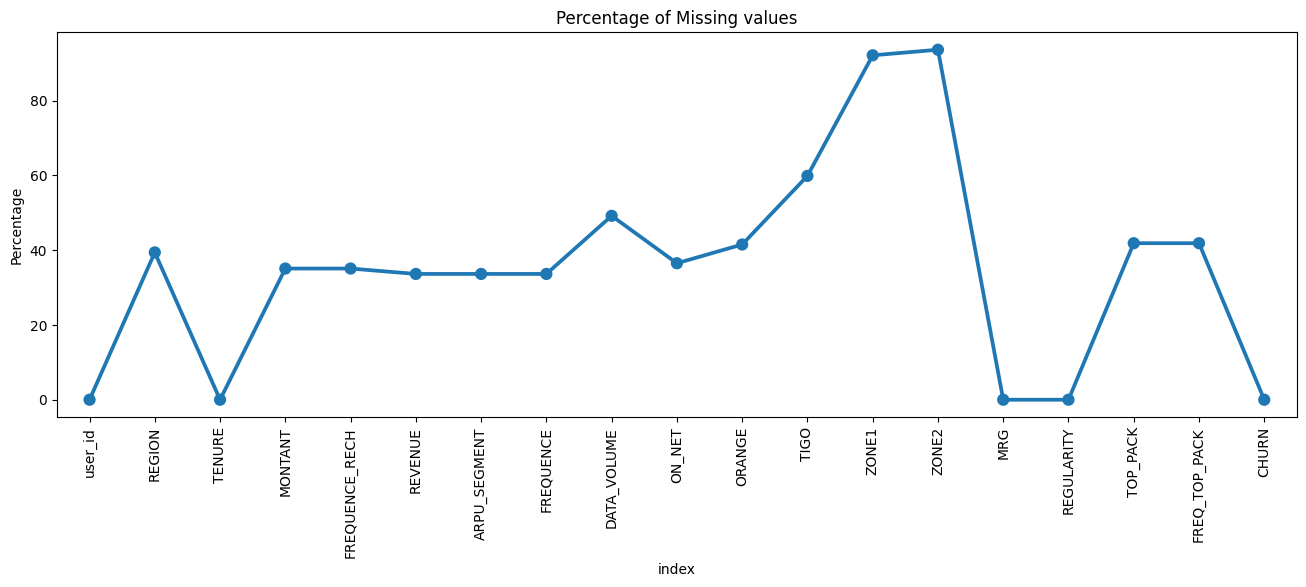

In [14]:
# Plotting  a Graphical view of the percentage of our Missing Data
missing = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

In [15]:
# creating a copy of the train dataset so we can make chanegs to it 
train_df=train.copy()

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Univariate Analysis
in this section we will explore, analyze, visualize each variable independently of the others.

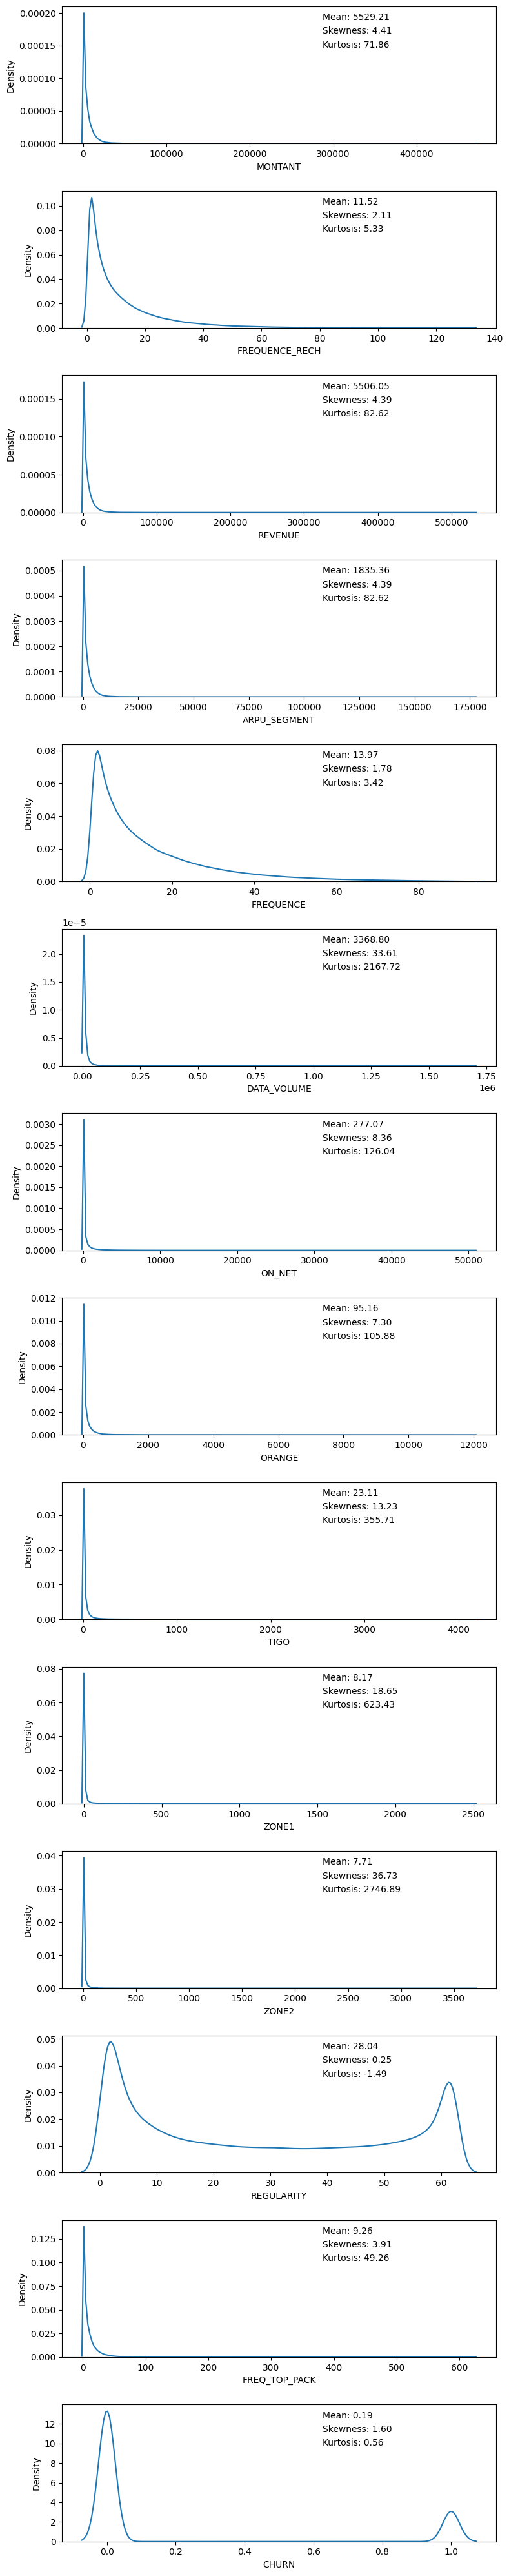

In [16]:

# Extracting all numerical variables 
num_cols = train_df.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=train, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train[col].skew()
    kurtosis_val = train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

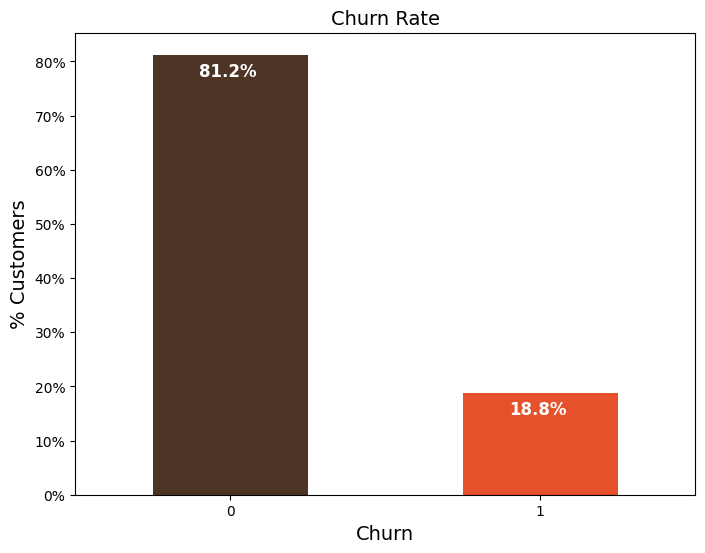

In [17]:
# Checking the percentage of customers who churned again those who did not 
colors = ['#4D3425','#E4512B']
ax = (train_df['CHURN'].value_counts()*100.0 /len(train)).plot(kind='bar', stacked = True, 
                                                                          rot = 0, color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

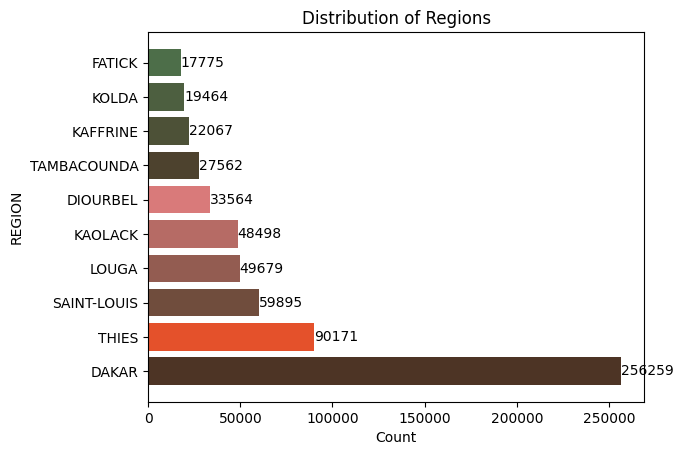

In [18]:
#Horizontal bar distribution of the Region
region= train_df['REGION'].value_counts().head(10)
colors = ['#4D3425','#E4512B','#704D3D','#935C51','#B66B65','#D97A7A','#4D422E','#4D5137','#4D5F40','#4D6E49']

plt.barh(region.index, region.values, color=colors)
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Distribution of Regions')

# Add data labels
for i, count in enumerate(region.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

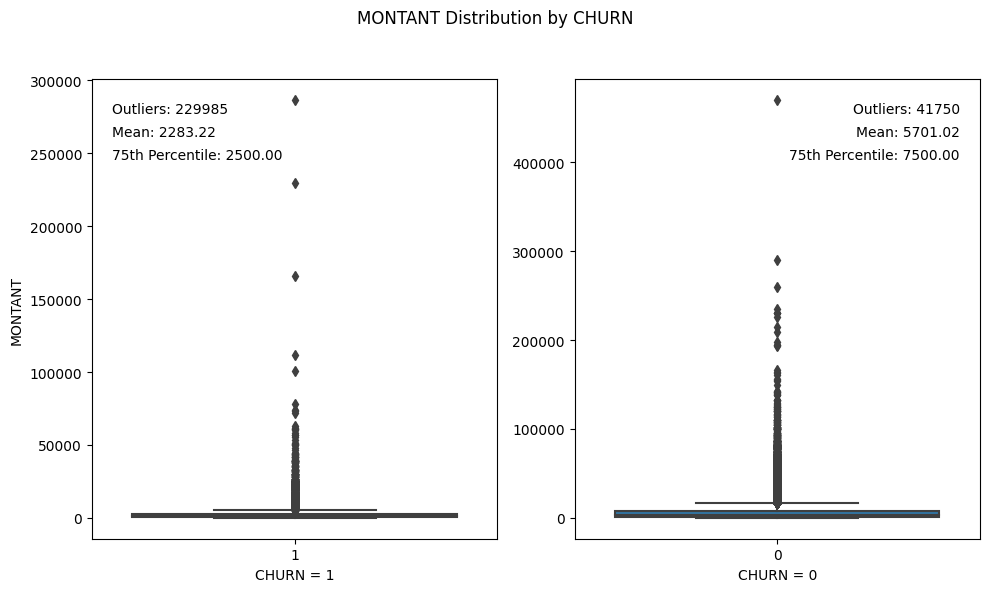

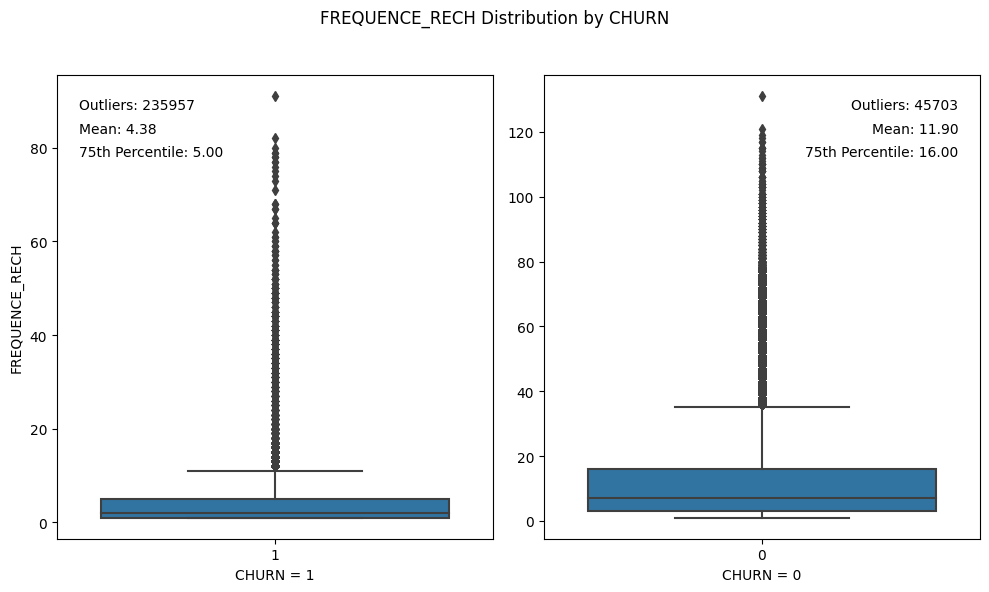

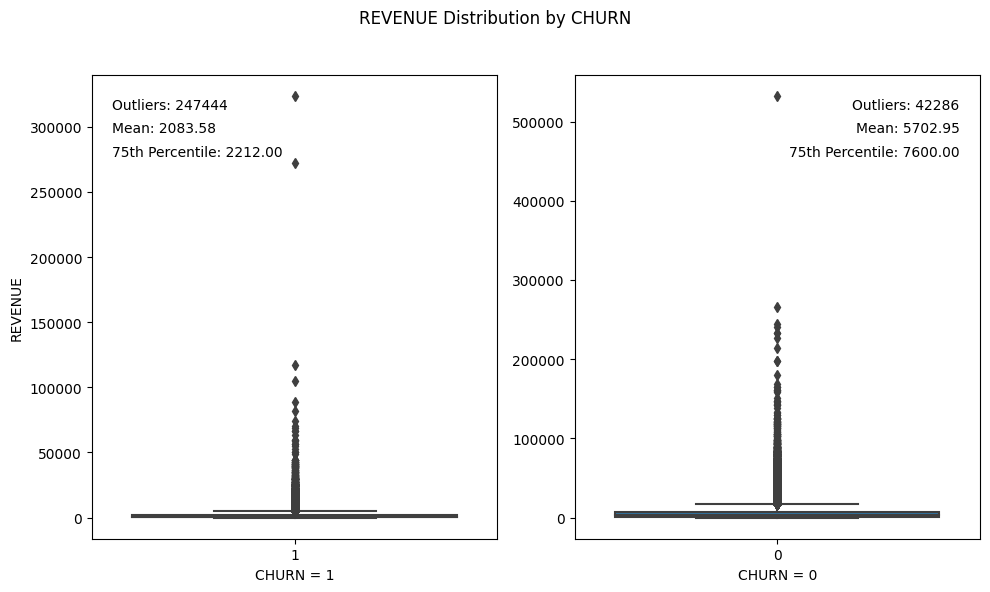

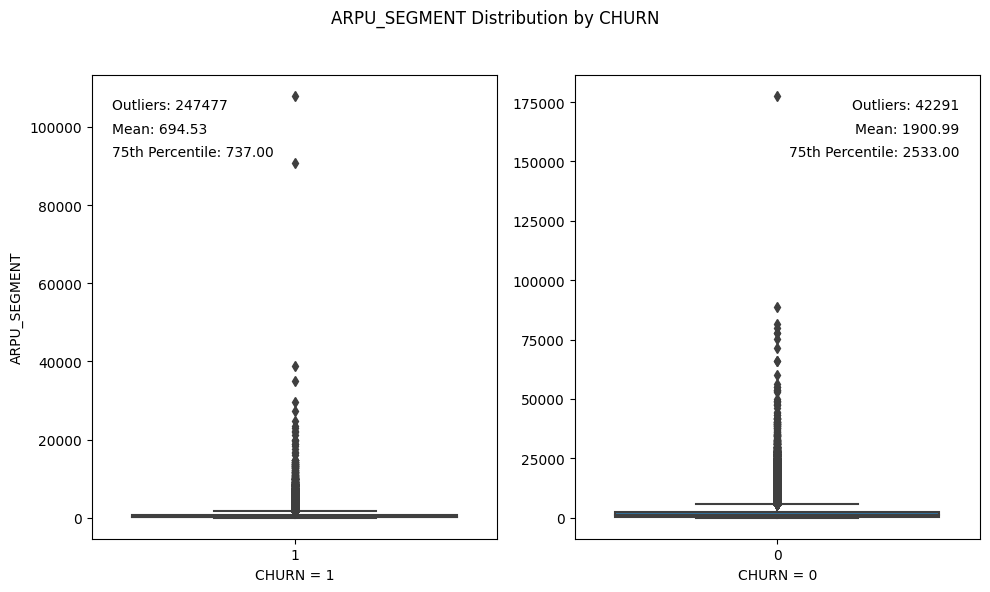

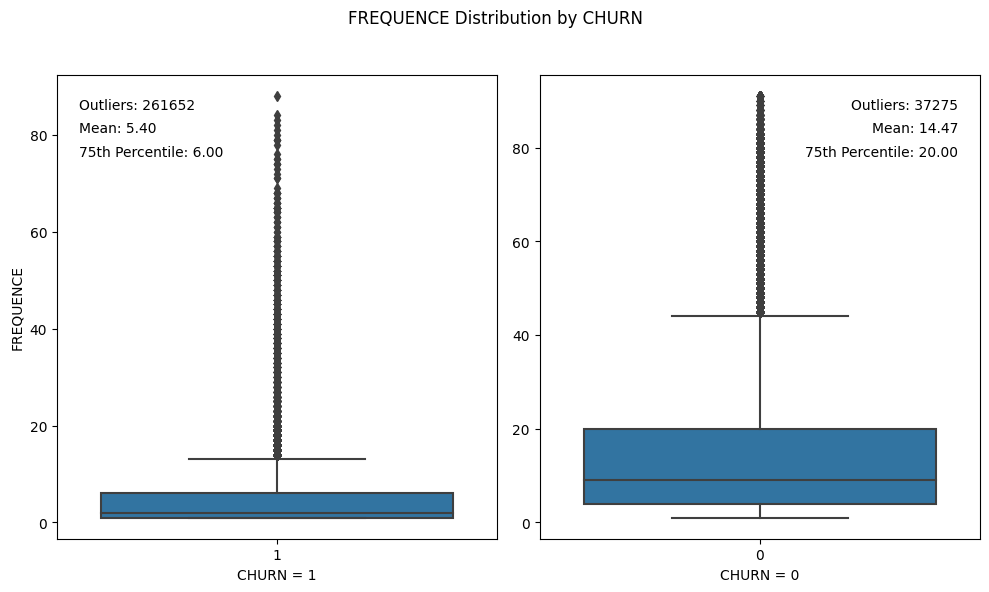

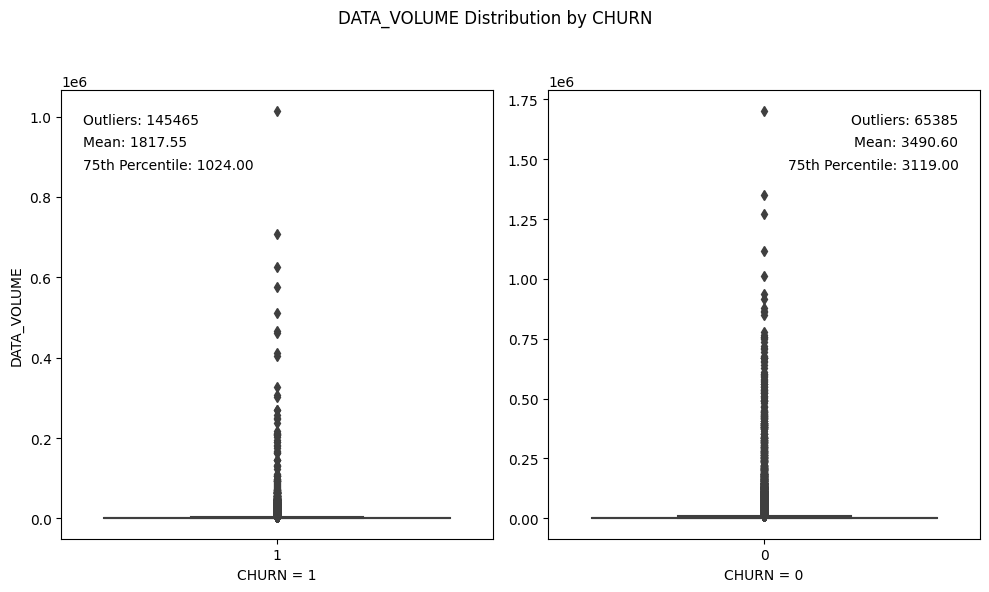

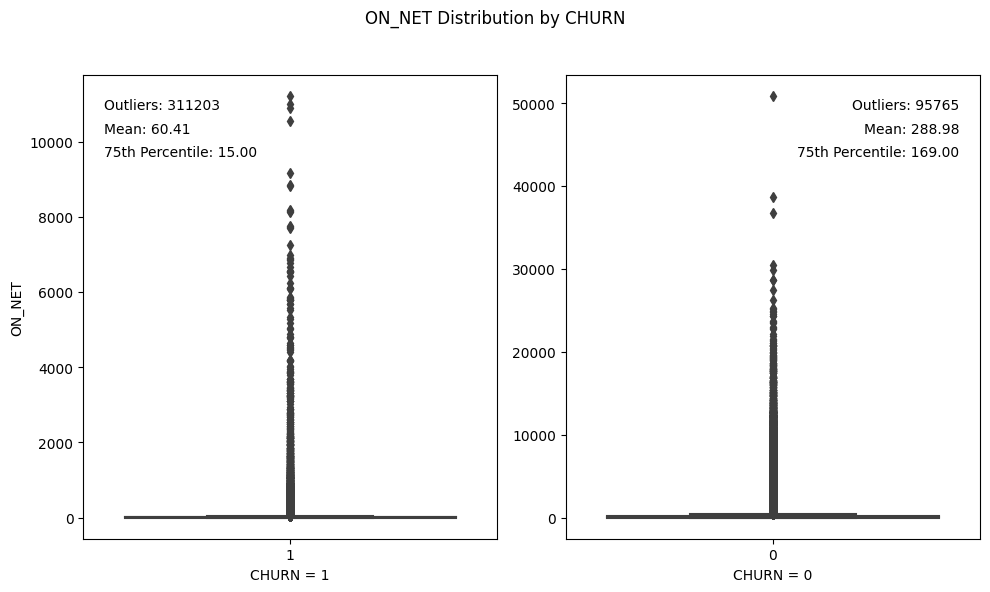

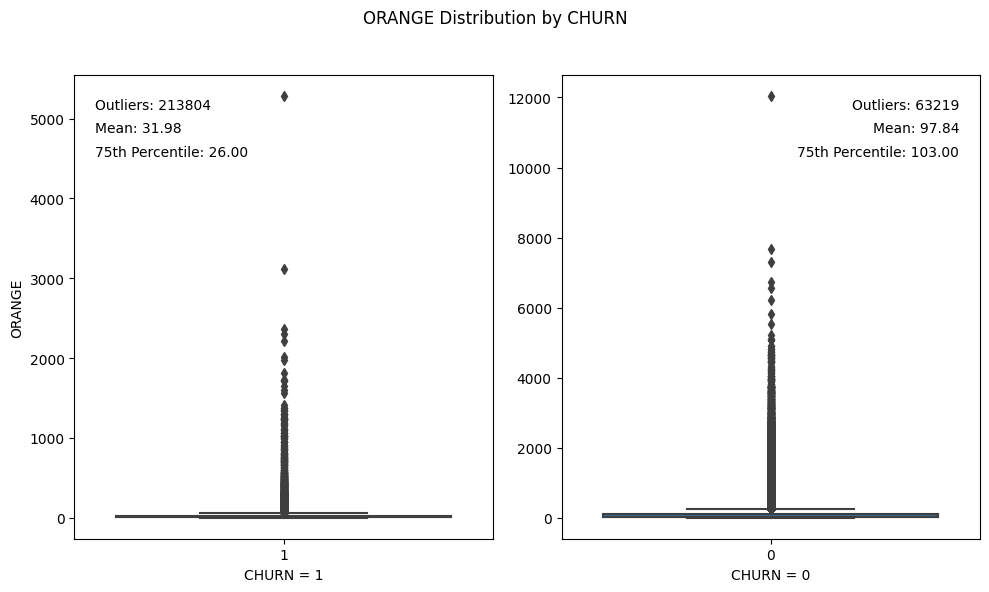

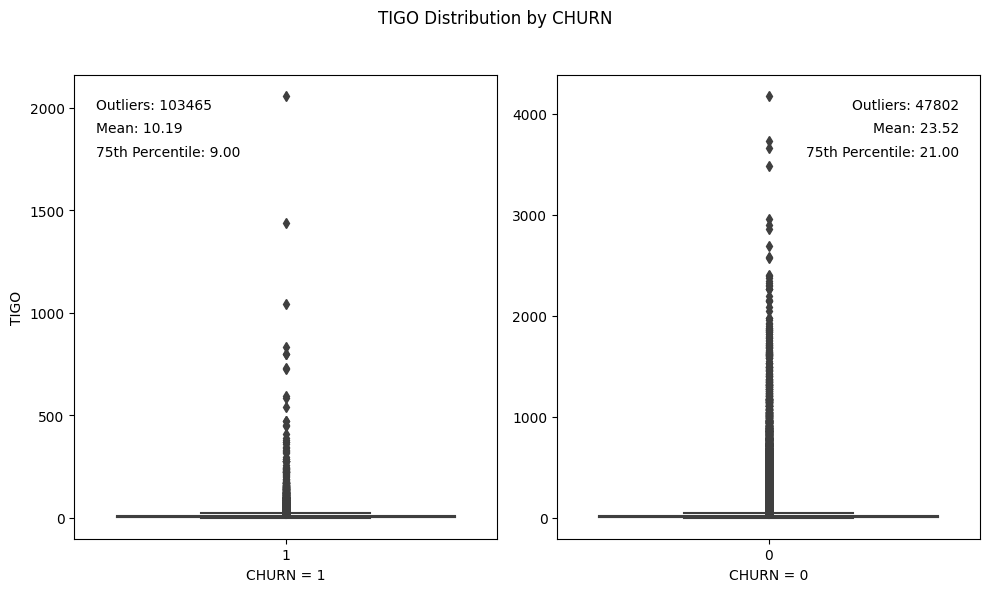

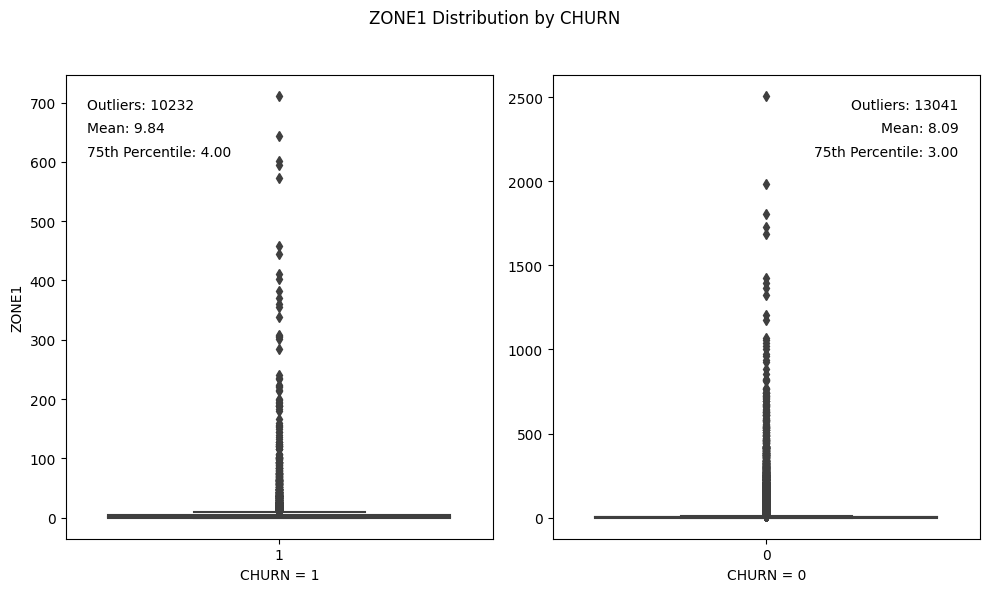

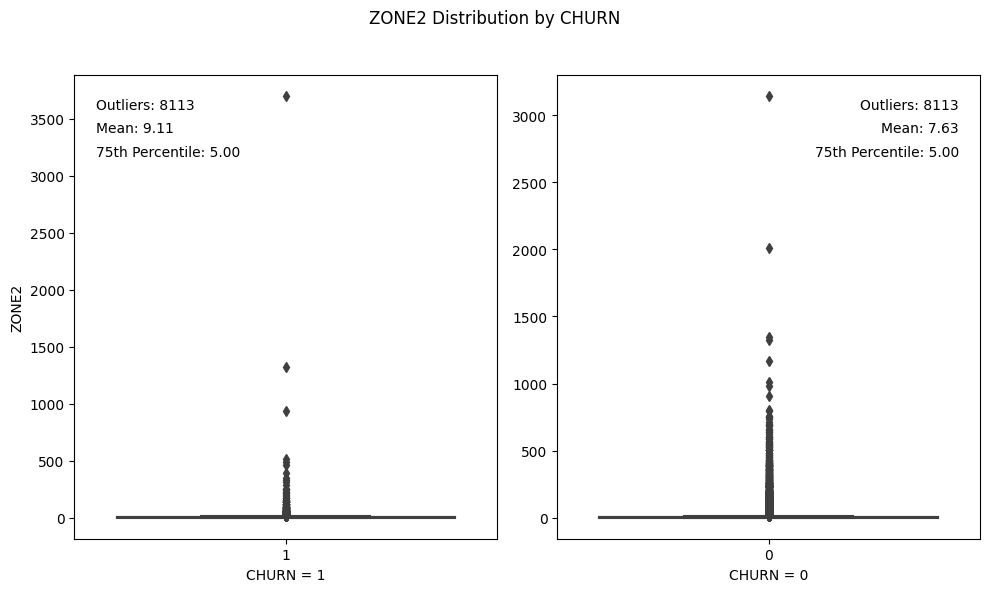

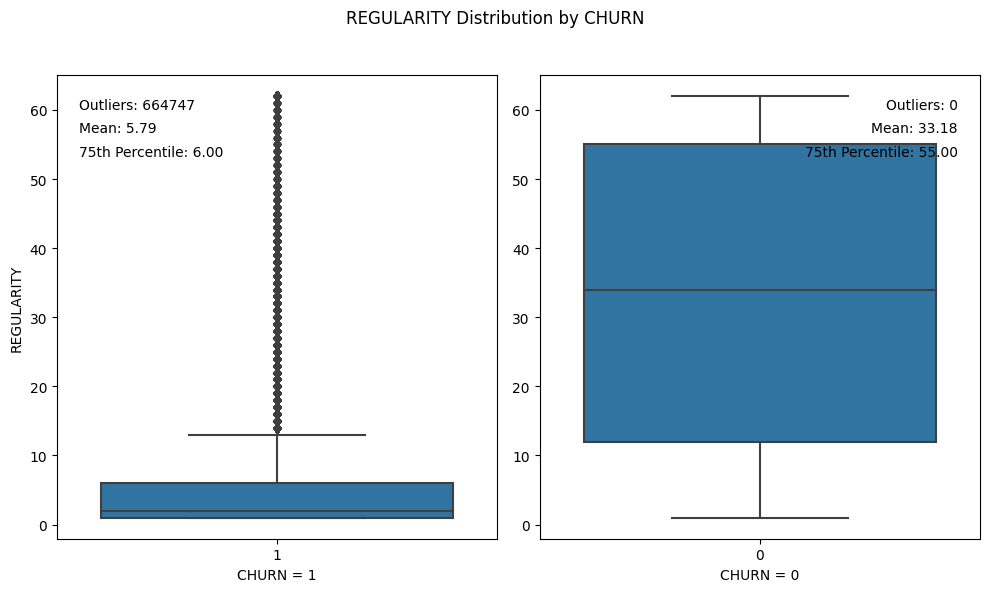

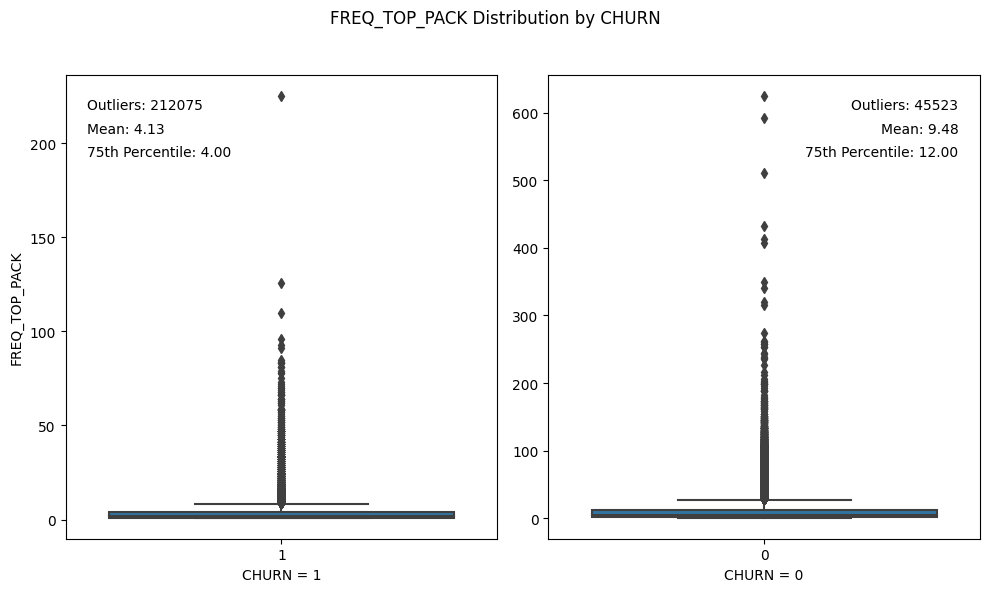

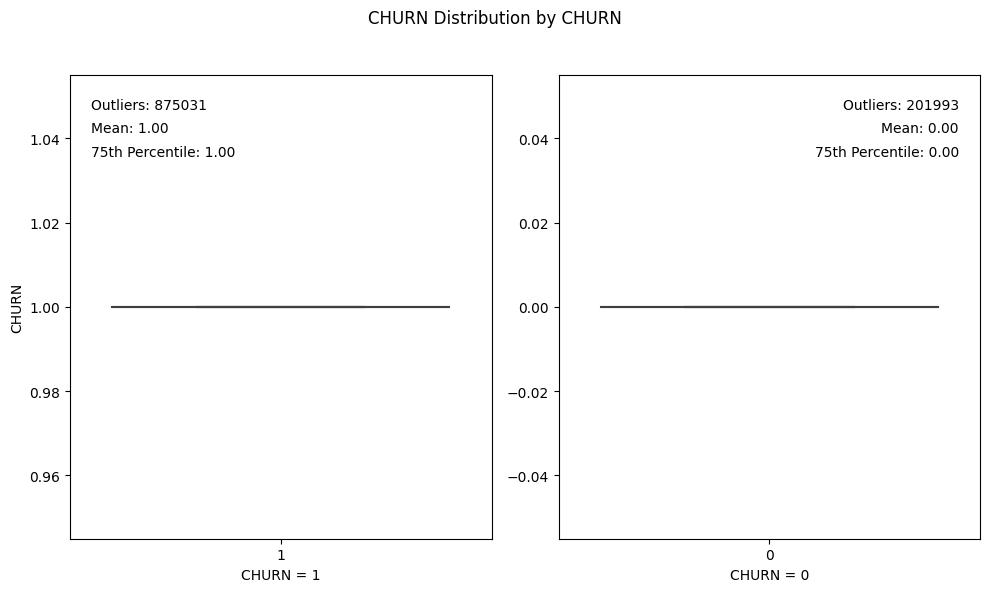

In [19]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_df[train_df['CHURN'] == 1], x='CHURN', y=col)
    q75_1 = train_df[train_df['CHURN'] == 1][col].quantile(0.75)
    q25_1 = train_df[train_df['CHURN'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = train_df[(train_df[col] < q25_1 - 1.5 * iqr_1) | (train_df[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {train_df[train_df['CHURN'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)
    
    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_df[train_df['CHURN'] == 0], x='CHURN', y=col)
    q75_0 = train_df[train_df['CHURN'] == 0][col].quantile(0.75)
    q25_0 = train_df[train_df['CHURN'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = train_df[(train_df[col] < q25_0 - 1.5 * iqr_0) | (train_df[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {train_df[train_df['CHURN'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')
    
    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

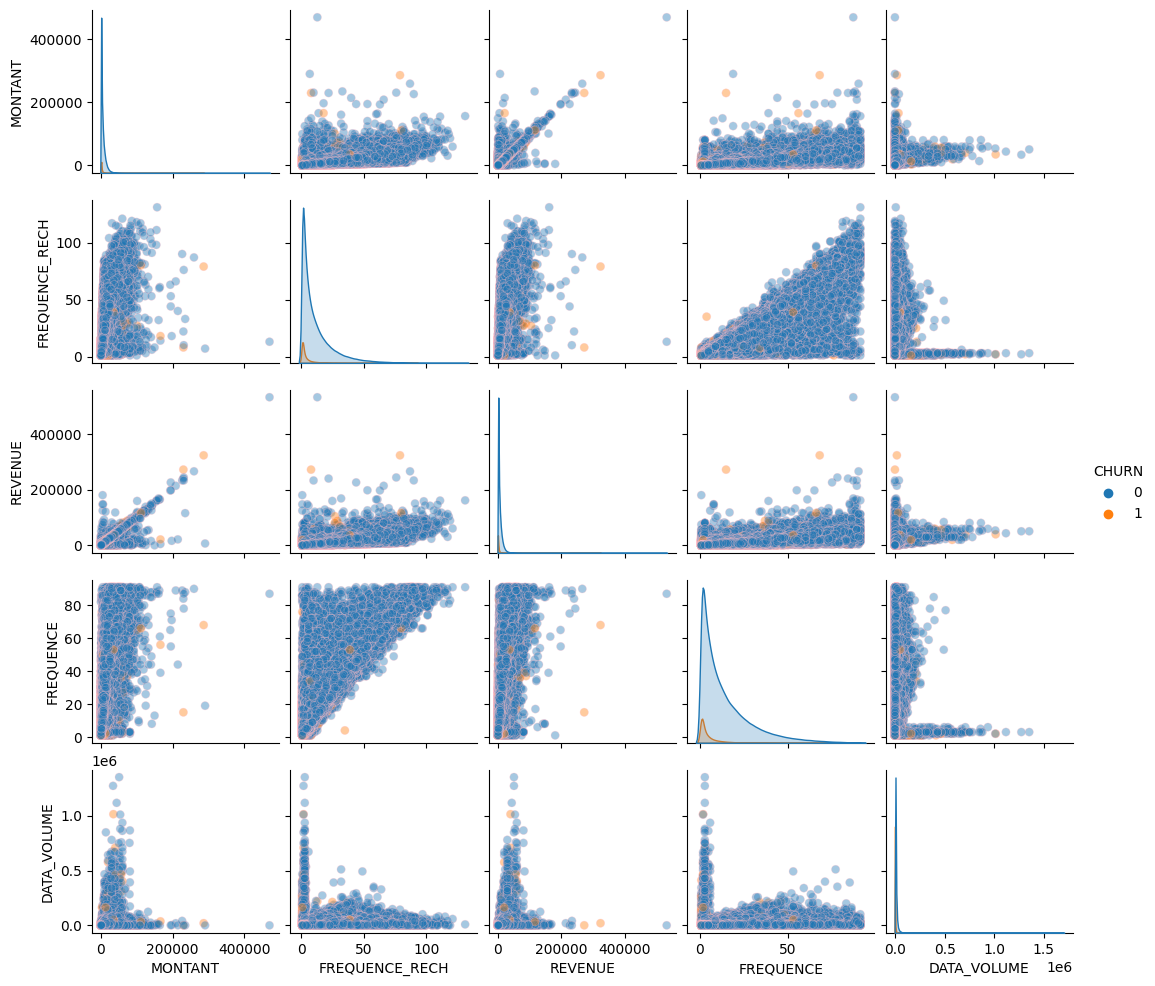

In [20]:
# split 'MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN churn and not_churn categories
sns.pairplot(train_df[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='pink'),height=2,aspect=1.1)

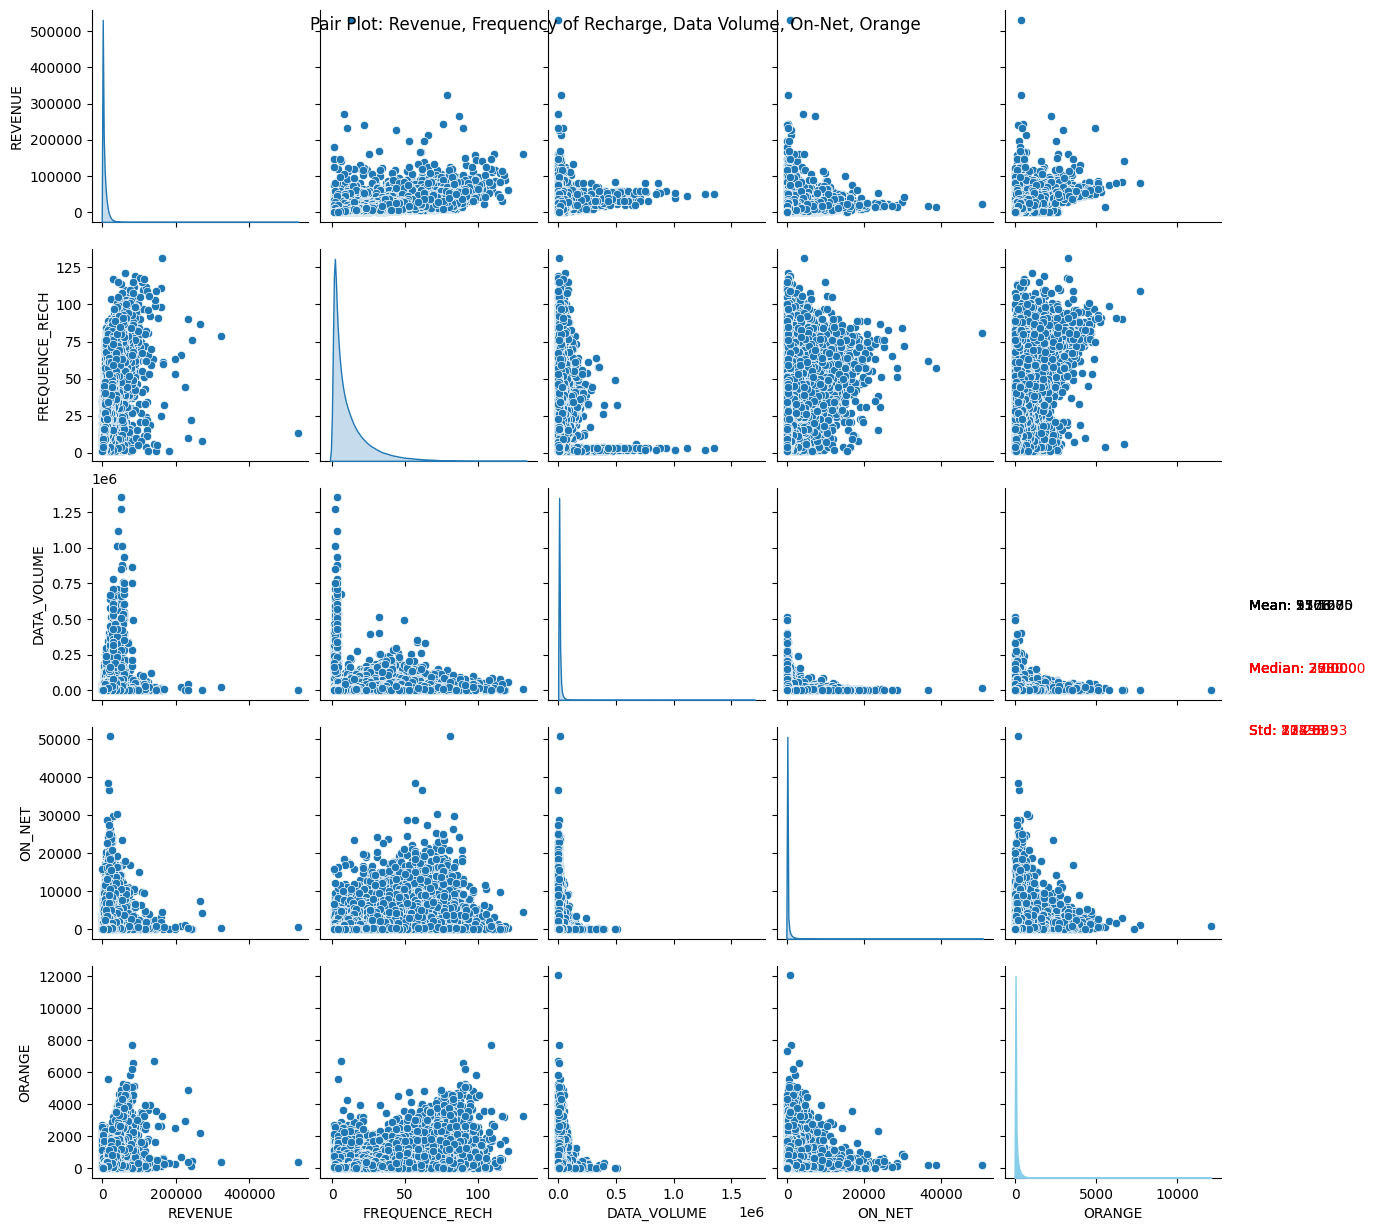

In [21]:
# Create a pair plot with KDE
sns.pairplot(train_df[['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']], diag_kind='kde')

# Add color customization
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightblue']
for i, j in zip(range(5), colors):
    plt.gca().get_children()[i].set_color(j)

# Add statistics annotations
numerical_cols = ['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']
for col in numerical_cols:
    mean = train_df[col].mean()
    median = train_df[col].median()
    std = train_df[col].std()
    plt.gca().annotate(f"Mean: {mean:.2f}", xy=(1, 0.5), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='black', ha='left', va='center')
    plt.gca().annotate(f"Median: {median:.2f}", xy=(1, 0.45), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')
    plt.gca().annotate(f"Std: {std:.2f}", xy=(1, 0.4), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')

# Set title
plt.suptitle('Pair Plot: Revenue, Frequency of Recharge, Data Volume, On-Net, Orange')

# Display the plot
plt.show()

In [22]:
# drop the user_ID column as we don't need it for modelling
columns_to_drop = ['user_id']

# Use the drop method to remove the specified column(s)
train_df = train_df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the column(s)
train_df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [23]:
# Calculate correlation matrix
corr = train_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'DAKAR'

In [ ]:
#Checking the correlation of the target variable with all the other variables 
churn_corr = train_df.corr()[['CHURN']].sort_values(by='CHURN', ascending=False)
churn_corr

ValueError: could not convert string to float: 'DAKAR'

In [ ]:

#Visualising the correlation between other variables and churn
plt.figure(figsize=(8,5))
# create a barplot for the churn-correlation
sns.barplot(data=churn_corr, x=churn_corr.index, y='CHURN')
plt.ylabel('Churn Correlation')
plt.xlabel('Column Features')
plt.xticks(rotation=90)
plt.show();

NameError: name 'churn_corr' is not defined

<Figure size 800x500 with 0 Axes>

In [24]:
train_df.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

### **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.



In [25]:
from scipy.stats import chi2_contingency

In [26]:
# Creating a contingency table
contingency_table = pd.crosstab(train['TENURE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between TENURE and CHURN.")

Chi-square statistic: 2898.5207691813353
P-value: 0.0
Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.


### **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

In [27]:
# Creating a contingency table
contingency_table = pd.crosstab(train['REVENUE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between REVENUE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between REVENUE and CHURN.")

Chi-square statistic: 59958.41001124388
P-value: 0.0
Reject the null hypothesis. There is no significant relationship between REVENUE and CHURN.


### Answering Business Questions 

1. What is the Company’s overall churn rate throughout the observed period?

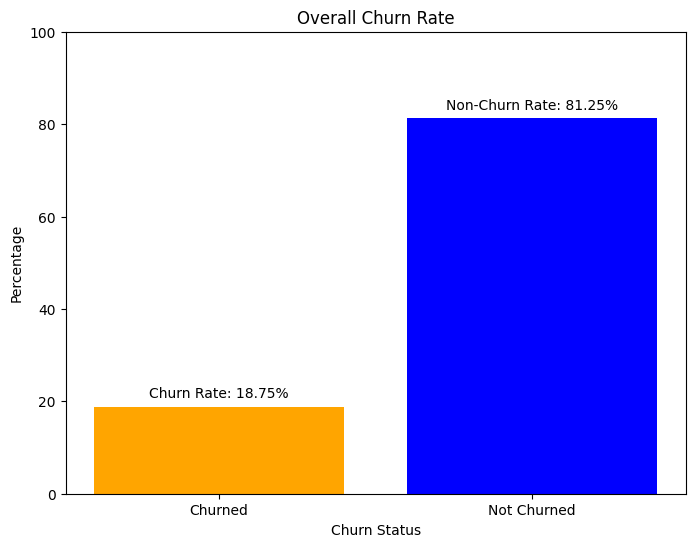

In [28]:
# Calculate the overall churn rate
churn_rate = train_df['CHURN'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Not Churned'], [churn_rate, 100 - churn_rate], color=['orange', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.ylim(0, 100)
plt.text(0, churn_rate + 2, f'Churn Rate: {churn_rate:.2f}%', ha='center')
plt.text(1, 100 - churn_rate + 2, f'Non-Churn Rate: {100 - churn_rate:.2f}%', ha='center')

plt.show()


2. Are there particular regions that exhibit a higher churn rate than others?

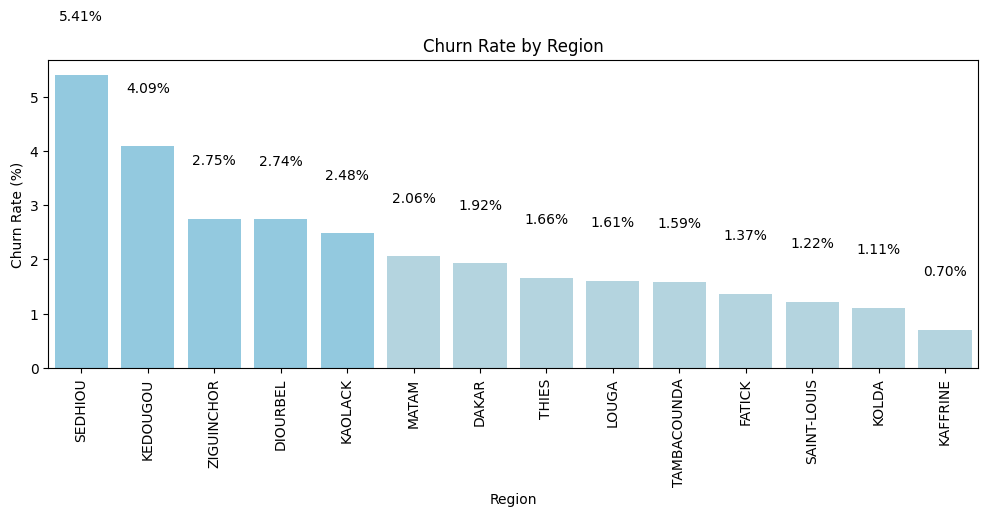

In [29]:
# Calculate the churn rate by region
churn_rate_by_region = train_df.groupby('REGION')['CHURN'].mean() * 100

# Sort the regions by churn rate in descending order
sorted_regions = churn_rate_by_region.sort_values(ascending=False)

# Define colors for the bars
colors = ['skyblue' if rate > sorted_regions.mean() else 'lightblue' for rate in sorted_regions]

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(x=sorted_regions.index, y=sorted_regions, palette=colors)
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')

# Add labels to the bars
for i, rate in enumerate(sorted_regions):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=90)
plt.show()


3. Which tenure are likely to churn more are compared to the average rate of churn?

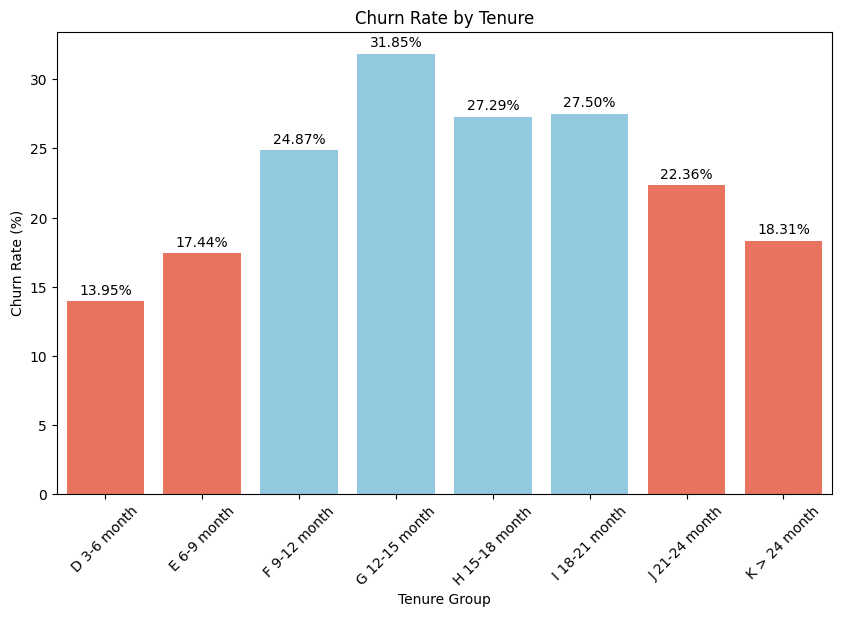

In [30]:
# Calculate the churn rate by tenure group
churn_rate_by_tenure = train_df.groupby('TENURE')['CHURN'].mean() * 100

# Sort the tenure groups in ascending order
sorted_tenure = churn_rate_by_tenure.sort_index()

# Define colors for the bars
colors = ['tomato' if rate < sorted_tenure.mean() else 'skyblue' for rate in sorted_tenure]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tenure.index, y=sorted_tenure, palette=colors)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

# Add labels to the bars
for i, rate in enumerate(sorted_tenure):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()


4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

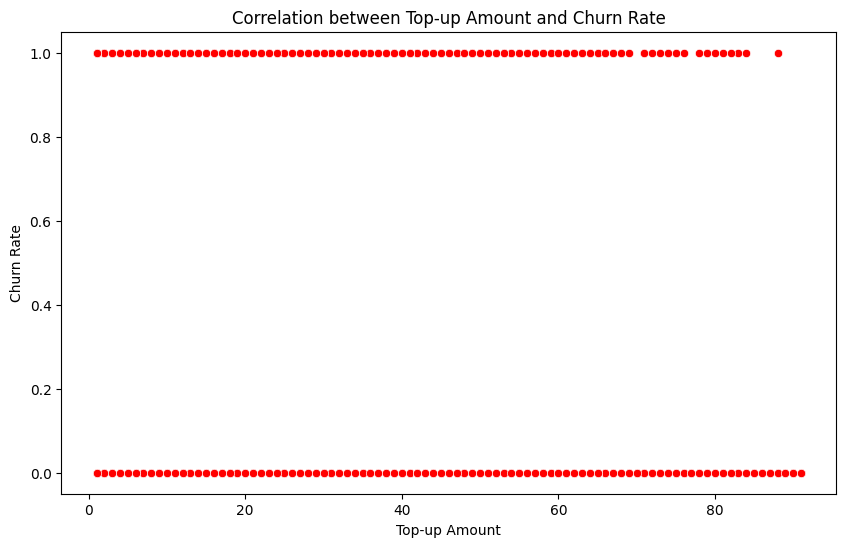

In [31]:
# Plot correlation between top-up amount and churn rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='FREQUENCE', y='CHURN',  color='red')
plt.title('Correlation between Top-up Amount and Churn Rate')
plt.xlabel('Top-up Amount')
plt.ylabel('Churn Rate')
plt.show()

5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

/Users/fiifiabassah-konadu/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


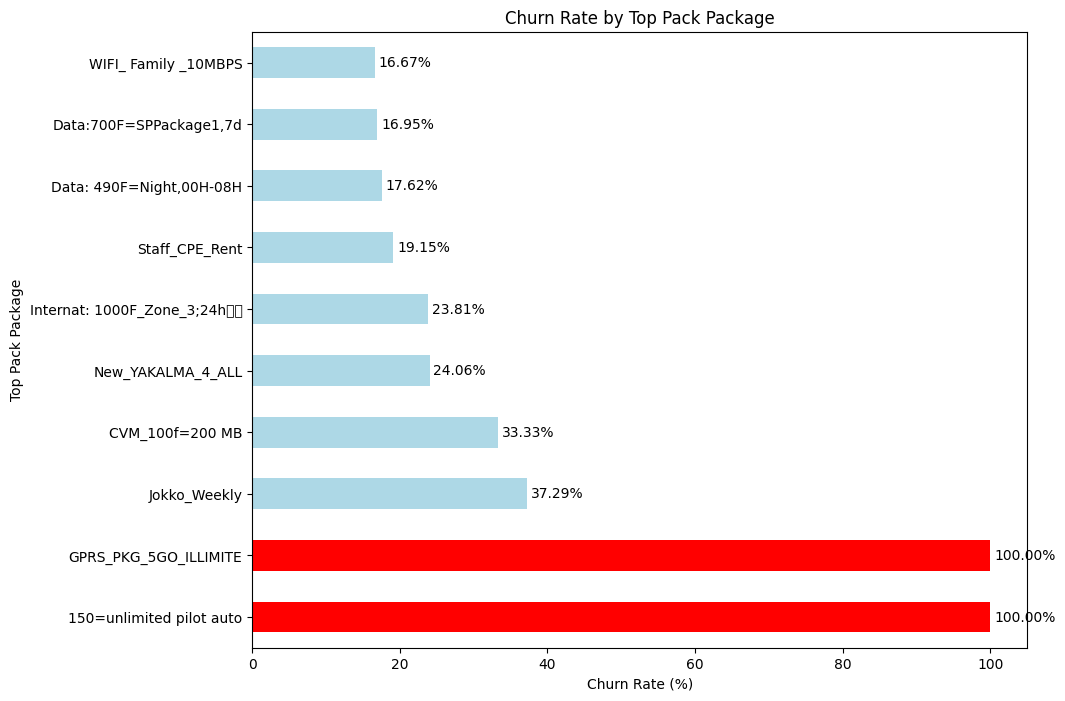

In [32]:
# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = train_df.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in descending order and select the top 10
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['red' if rate > churn_rate_by_top_pack.mean() else 'lightblue' for rate in churn_rate_by_top_pack]

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = churn_rate_by_top_pack.plot(kind='barh', color=colors)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Top Pack Package')
plt.title('Churn Rate by Top Pack Package')

# Add labels to the bars
for i, rate in enumerate(churn_rate_by_top_pack):
    plt.text(rate + 0.5, i, f'{rate:.2f}%', va='center')

plt.show()

6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

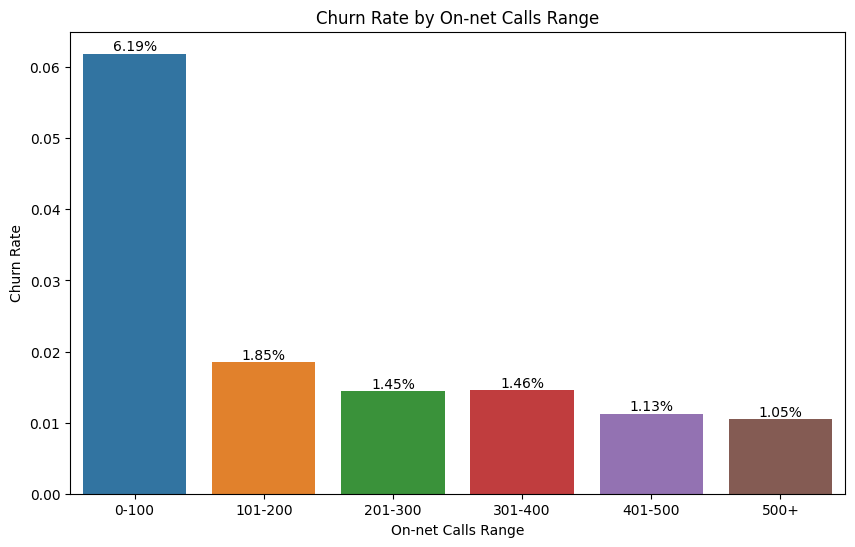

In [33]:

# Create bins for ON_NET 
labels = pd.cut(train_df['ON_NET'], bins=[0, 100, 200, 300, 400, 500, float('inf')],
                labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

# 'labels' now contains the bin labels for each value in 'ON_NET'

# Calculate the churn rate for different ranges of on-net calls
churn_rate_by_onnet_range = train_df.groupby(labels)['CHURN'].mean()

# Plot the churn rate for different ranges of on-net calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_onnet_range.index, y=churn_rate_by_onnet_range.values)
plt.title('Churn Rate by On-net Calls Range')
plt.xlabel('On-net Calls Range')
plt.ylabel('Churn Rate')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = f'{height * 100:.2f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()




7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?


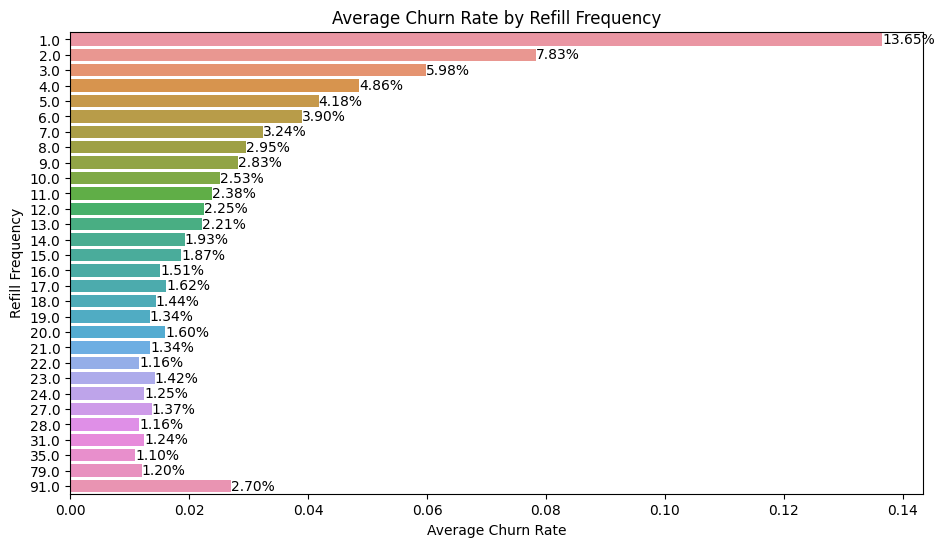

In [34]:
# Calculate the average churn rate for different categories of refill frequency
avg_churn_rate = train_df.groupby('FREQUENCE_RECH')['CHURN'].mean().sort_values(ascending=False).head(30)

# Plot the average churn rate for different refill frequency categories
plt.figure(figsize=(11, 6))
sns.barplot(x=avg_churn_rate.values, y=avg_churn_rate.index, orient='horizontal')
plt.title('Average Churn Rate by Refill Frequency')
plt.xlabel('Average Churn Rate')
plt.ylabel('Refill Frequency')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    percentage = f'{width * 100:.2f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, percentage, ha='left', va='center')

plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [35]:
# Check for missing values in the DataFrame
missing_values = train_df.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

print(missing_count)

REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64


## Impute Missing Values

In [36]:

# split the data into features (toBeImputed) and target variable (y)
toBeImputed = train_df

In [37]:
# Check for missing values in the DataFrame
missing_values = toBeImputed.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values in each column
print("\nCount of missing values in each column:")
print(missing_count)



Count of missing values in each column:
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64


<Axes: >

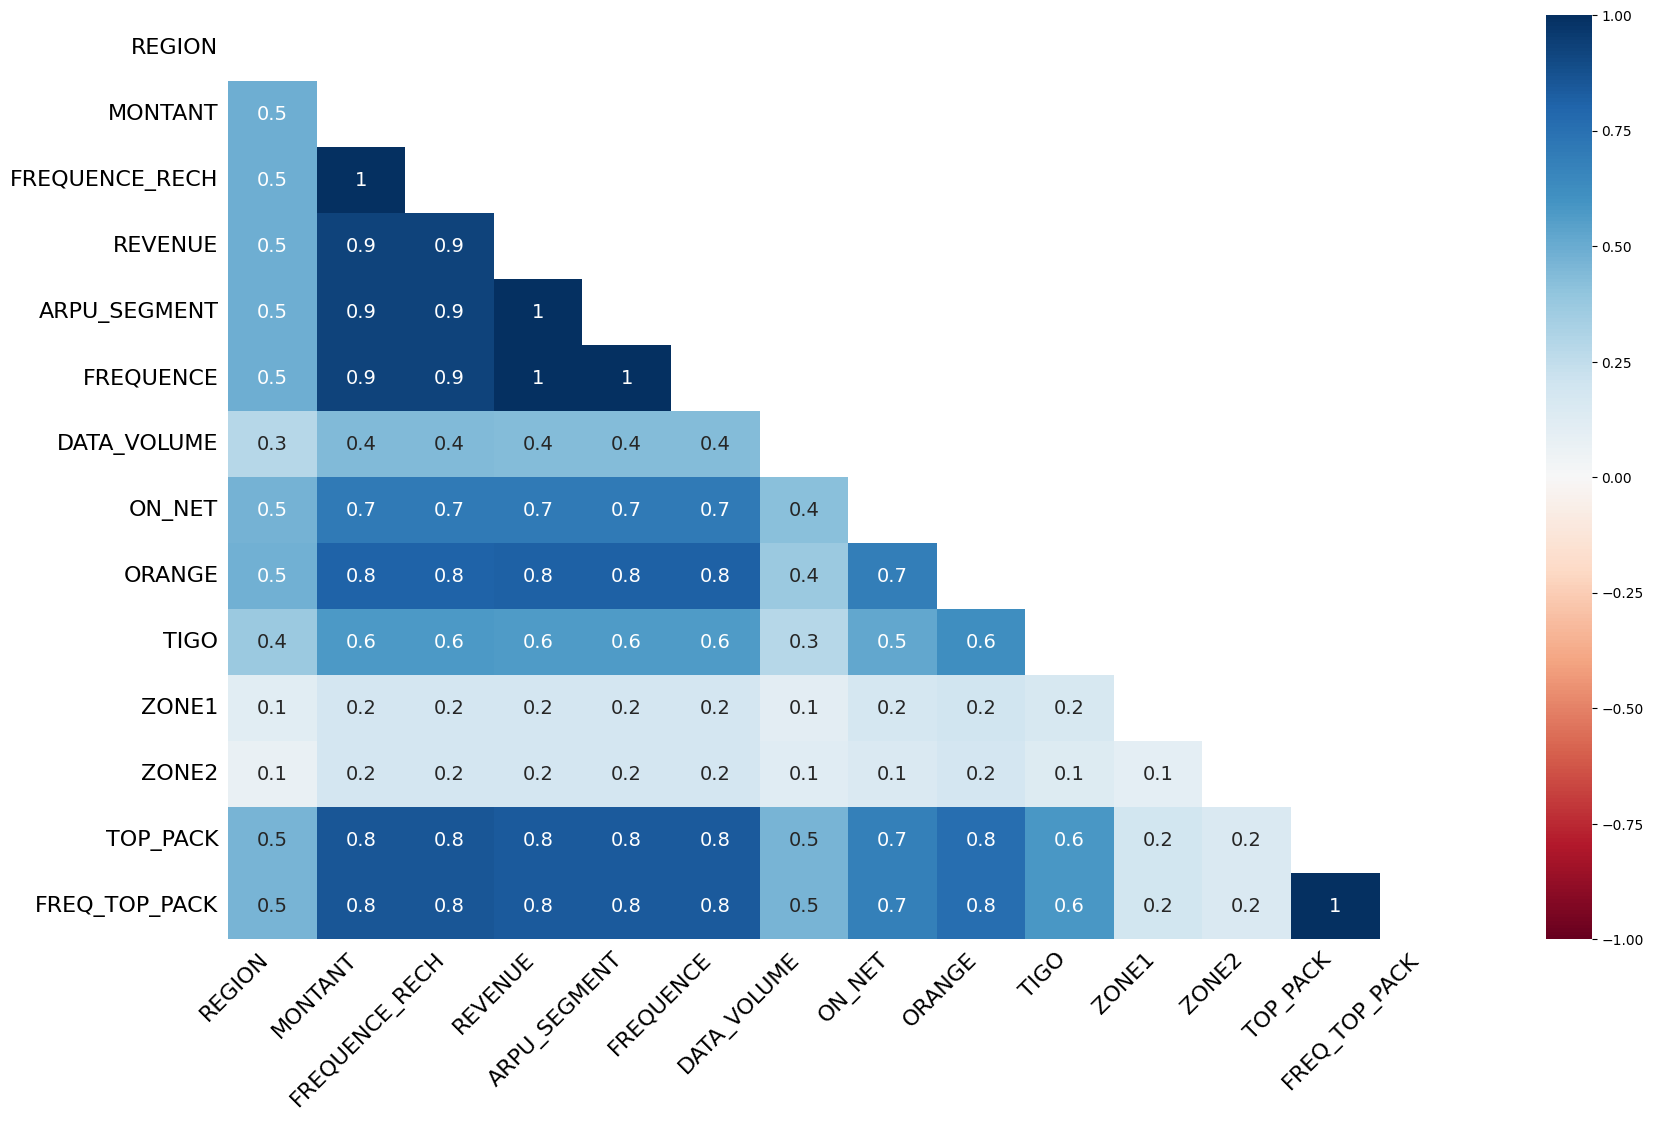

In [38]:
mno.heatmap(toBeImputed)

The __heatmap function__ shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

<Axes: >

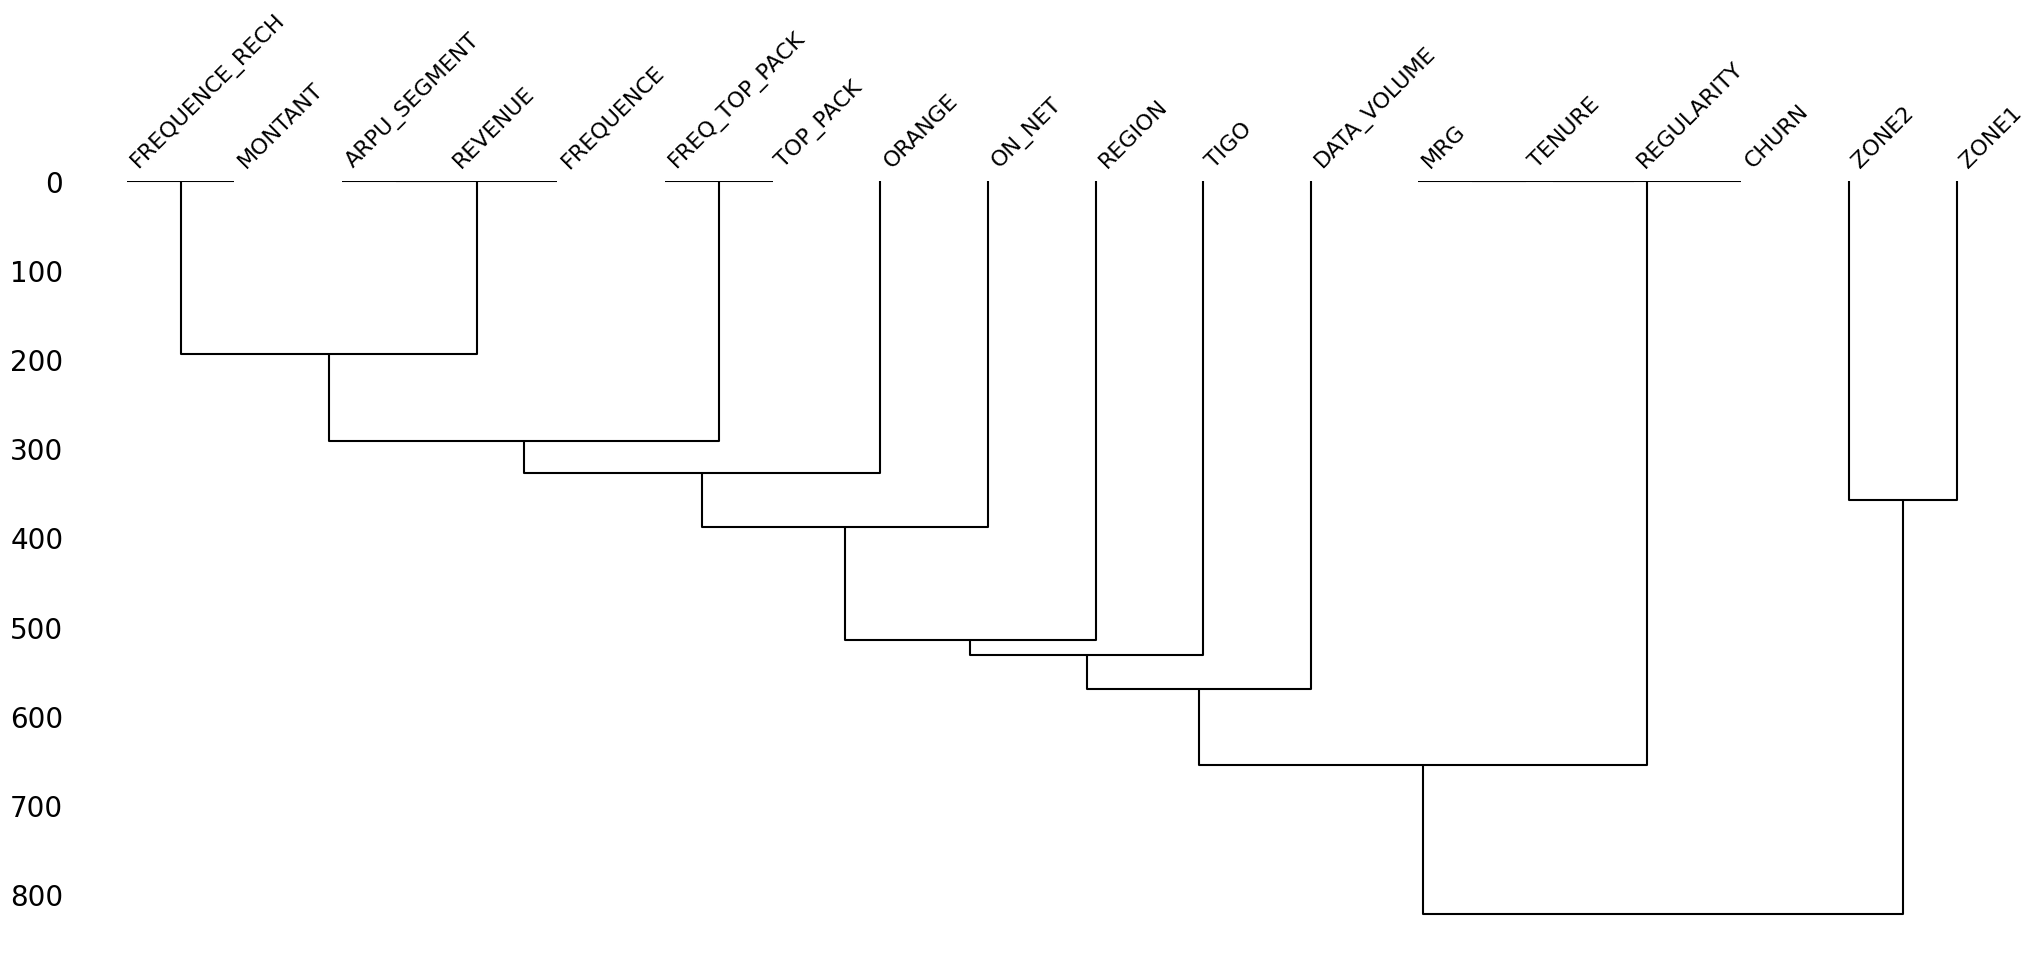

In [39]:
mno.dendrogram(toBeImputed)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence — one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of __'on_net'__ tends to be more similar to __'orange'__ than to __'region'__ and so on. 

In [40]:
# dropping rows with missing values from these 3 columns, because absence in these columns is correlated with absence in other columns
toBeImputed.dropna(subset=['ARPU_SEGMENT', 'REVENUE', 'FREQUENCE'], how = 'all', inplace=True)
toBeImputed.shape

(714669, 18)

In [41]:
toBeImputed.isnull().sum()

REGION            160114
TENURE                 0
MONTANT            26669
FREQUENCE_RECH     26669
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME       240454
ON_NET             87050
ORANGE             91907
TIGO              285619
ZONE1             632790
ZONE2             646093
MRG                    0
REGULARITY             0
TOP_PACK           88569
FREQ_TOP_PACK      88569
CHURN                  0
dtype: int64

<Axes: >

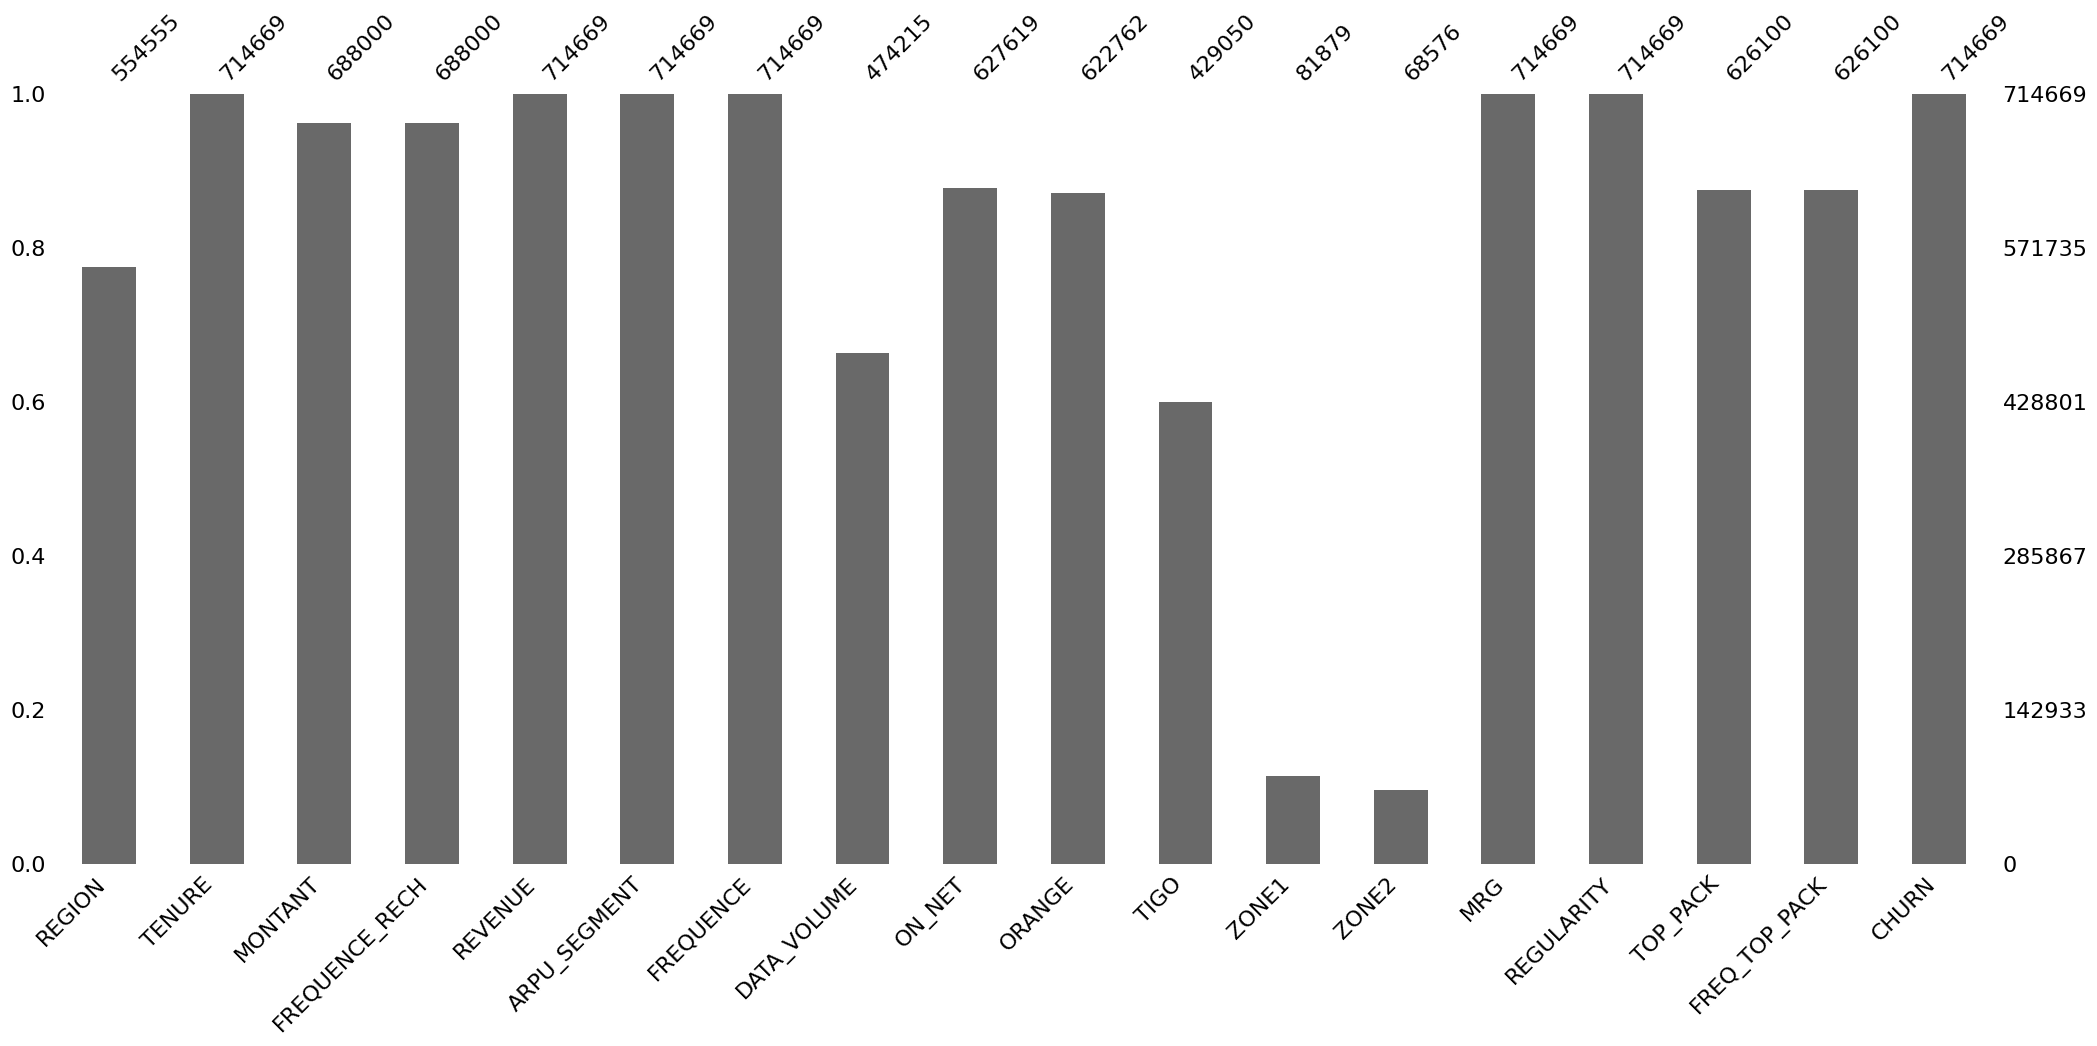

In [42]:
mno.bar(toBeImputed)

Percentages of missing values in 'zone1' and 'zone2' columns are greater than __90%.__ For that reason, we can drop those columns.

In [43]:
toBeImputed.drop(columns=['ZONE1', 'ZONE2'], axis=1, inplace=True)

From our earlier calculated correlation heatmap, we can see that REVENUE and ARPU_SEGMENT have a correlation value of 1, therefore we can drop one of the columns

In [44]:
toBeImputed.drop(columns=['ARPU_SEGMENT'], axis=1, inplace=True)

In [45]:
toBeImputed.nunique()

REGION               14
TENURE                8
MONTANT            4349
FREQUENCE_RECH      119
REVENUE           31810
FREQUENCE            91
DATA_VOLUME       32395
ON_NET             8201
ORANGE             2669
TIGO               1103
MRG                   1
REGULARITY           62
TOP_PACK            125
FREQ_TOP_PACK       206
CHURN                 2
dtype: int64

MRG has only one value and hence can be dropped 

In [46]:
toBeImputed.drop(columns=['MRG'], axis=1, inplace=True)
toBeImputed.shape

(714669, 14)

### Multivariate Feature Imputation

In [47]:
ord_enc = OrdinalEncoder()
toBeImputed["TENURE1"] = ord_enc.fit_transform(toBeImputed[["TENURE"]])
toBeImputed[["TENURE1", "TENURE"]].head(10)

,TENURE1,TENURE
0,7.0,K > 24 month
3,7.0,K > 24 month
4,7.0,K > 24 month
5,1.0,E 6-9 month
6,7.0,K > 24 month
9,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month
16,7.0,K > 24 month
17,7.0,K > 24 month


In [48]:
toBeImputed["TENURE1"].dtype

dtype('float64')

In [155]:
#exporting the Tenure encoder
output = open('ML Components/Tenure_Encoder.pkl', 'wb')
pickle.dump(ord_enc, output)
output.close()

#### 'FREQUENCE_RECH' and 'MONTANT' columns

In [49]:
cols = ['TENURE1', 'REGULARITY', 'FREQUENCE', 'REVENUE', 'FREQUENCE_RECH', 'MONTANT']
data = toBeImputed[cols]
data

,TENURE1,REGULARITY,FREQUENCE,REVENUE,FREQUENCE_RECH,MONTANT
0,7.0,62,52.0,21602.0,47.0,20000.0
3,7.0,61,25.0,7896.0,19.0,7900.0
4,7.0,56,29.0,12351.0,21.0,12350.0
5,1.0,62,3.0,2000.0,2.0,2000.0
6,7.0,6,1.0,3000.0,1.0,3000.0
...,...,...,...,...,...,...
1077016,7.0,62,38.0,16189.0,34.0,14800.0
1077017,7.0,46,9.0,2950.0,9.0,2800.0
1077020,7.0,34,5.0,2500.0,5.0,2500.0
1077022,7.0,16,1.0,600.0,1.0,600.0


In [50]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(data)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,TENURE1,REGULARITY,FREQUENCE,REVENUE,FREQUENCE_RECH,MONTANT
0,7.0,62.0,52.0,21602.0,47.0,20000.0
1,7.0,61.0,25.0,7896.0,19.0,7900.0
2,7.0,56.0,29.0,12351.0,21.0,12350.0
3,1.0,62.0,3.0,2000.0,2.0,2000.0
4,7.0,6.0,1.0,3000.0,1.0,3000.0


In [51]:
k = k.rename({'FREQUENCE_RECH': 'FREQUENCE_RECH1'}, axis=1)
k = k.rename({'MONTANT': 'MONTANT1'}, axis=1)
toBeImputed.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE1
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,0,7.0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,0,7.0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,0,7.0
5,DAKAR,E 6-9 month,2000.0,2.0,2000.0,3.0,4206.0,246.0,709.0,10.0,62,"On-net 500=4000,10d",1.0,0,1.0
6,DAKAR,K > 24 month,3000.0,1.0,3000.0,1.0,NaN,NaN,NaN,NaN,6,"Data:3000F=10GB,30d",1.0,0,7.0


In [52]:
# reset indexes in the dataframe
toBeImputed.reset_index(inplace=True)
toBeImputed.head()

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE1
0,0,DAKAR,K > 24 month,20000.0,47.0,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,0,7.0
1,3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,0,7.0
2,4,DAKAR,K > 24 month,12350.0,21.0,12351.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,0,7.0
3,5,DAKAR,E 6-9 month,2000.0,2.0,2000.0,3.0,4206.0,246.0,709.0,10.0,62,"On-net 500=4000,10d",1.0,0,1.0
4,6,DAKAR,K > 24 month,3000.0,1.0,3000.0,1.0,NaN,NaN,NaN,NaN,6,"Data:3000F=10GB,30d",1.0,0,7.0


In [53]:
toBeImputed.drop(columns=['index'], inplace=True)

In [54]:
extracted_col = k[["FREQUENCE_RECH1", 'MONTANT1']]
toBeImputed = pd.merge(toBeImputed, extracted_col, how = 'left', left_index = True, right_index = True)

In [55]:
toBeImputed.drop(columns=['FREQUENCE_RECH', 'MONTANT'], inplace=True)

<Axes: >

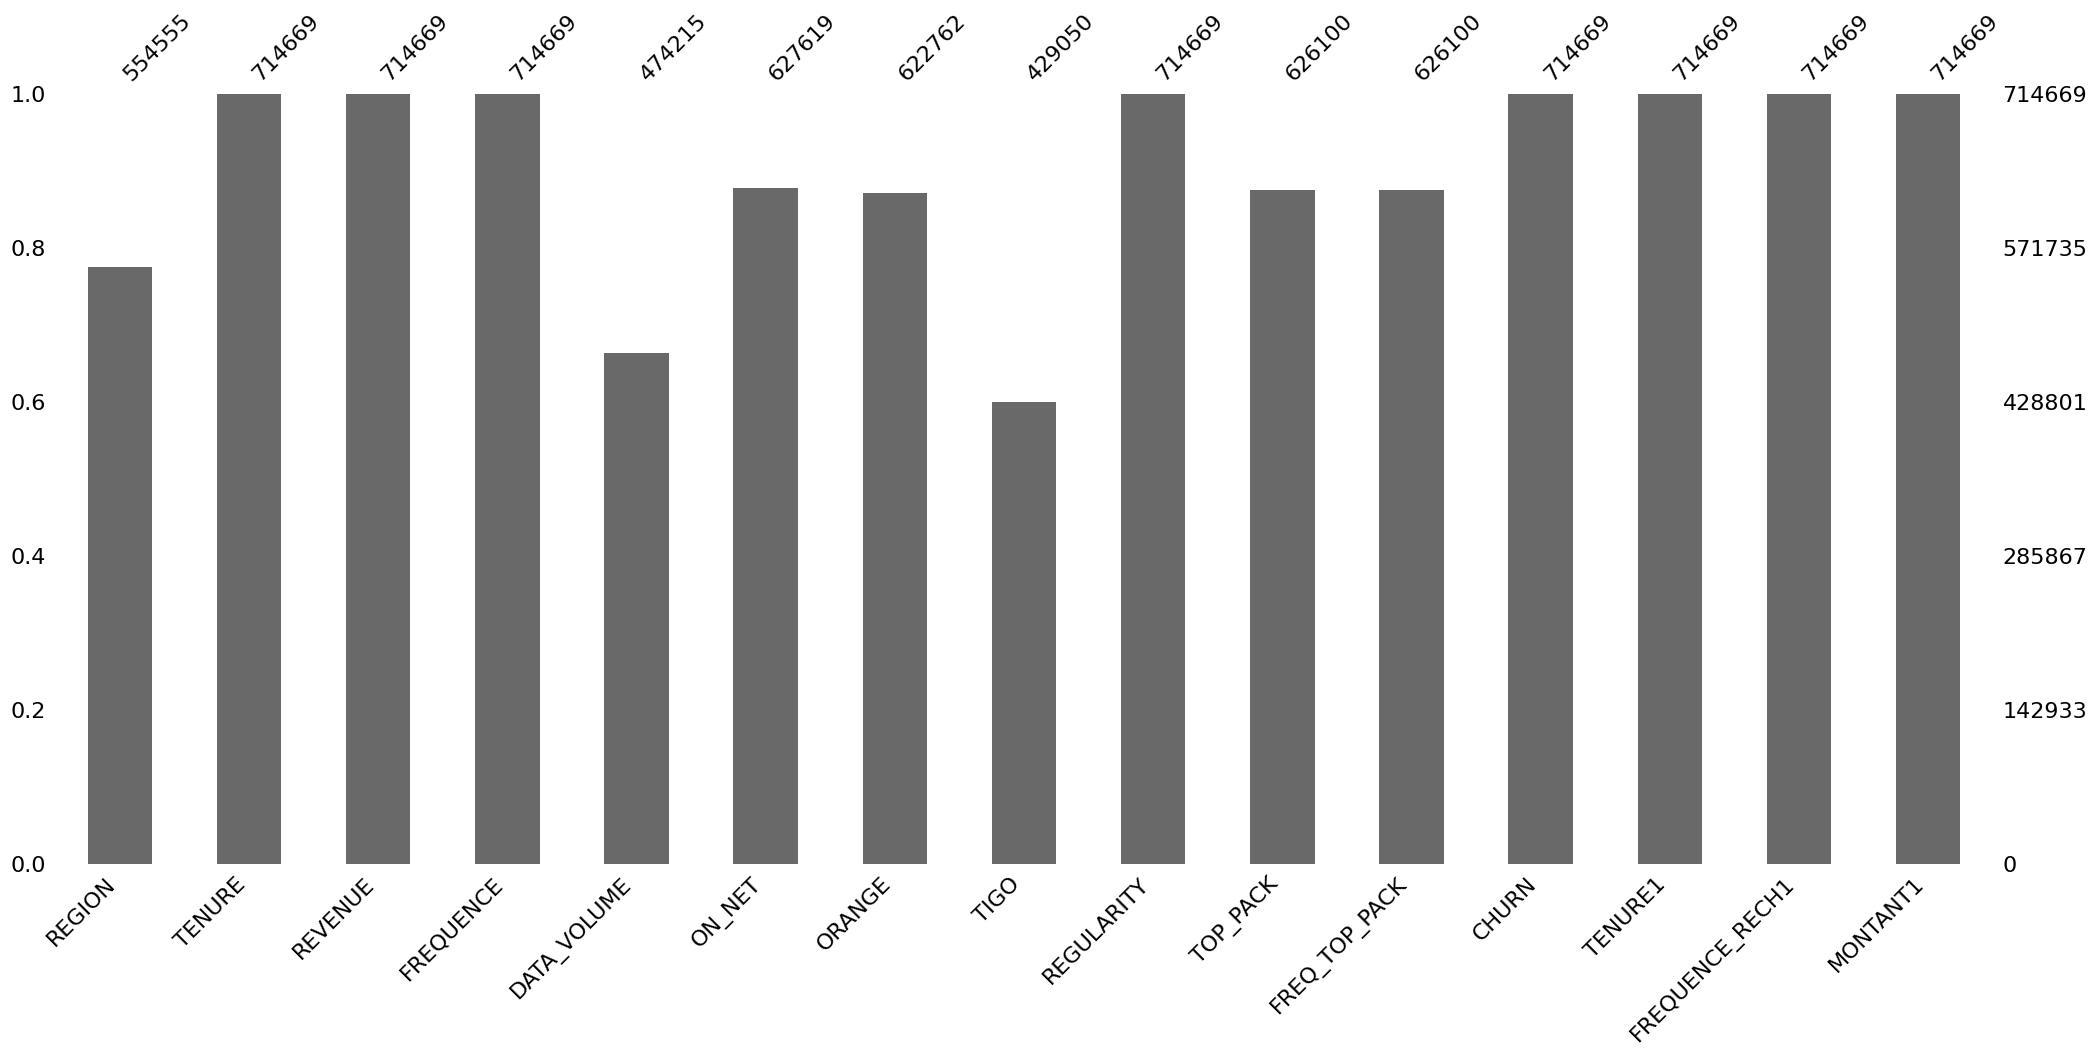

In [56]:
mno.bar(toBeImputed)

In [57]:
toBeImputed['TOP_PACK']=toBeImputed['TOP_PACK'].factorize()[0]
# -1 is nan values in 'top_pack'
toBeImputed['TOP_PACK'].replace({-1: np.nan }, inplace=True)

#### TOP_PACK and FREQ_TOP_PACK columns

In [58]:
cols = ['REGULARITY', 'FREQUENCE', 'TOP_PACK', 'FREQ_TOP_PACK']
data2 = toBeImputed[cols]

In [59]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(data2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'TOP_PACK': 'TOP_PACK1'}, axis=1, inplace=True)
m.rename({'FREQ_TOP_PACK': 'FREQ_TOP_PACK1'}, axis=1, inplace=True)
m

,REGULARITY,FREQUENCE,TOP_PACK1,FREQ_TOP_PACK1
0,62.0,52.0,0.0,30.0
1,61.0,25.0,1.0,7.0
2,56.0,29.0,2.0,11.0
3,62.0,3.0,3.0,1.0
4,6.0,1.0,4.0,1.0
...,...,...,...,...
714664,62.0,38.0,1.0,15.0
714665,46.0,9.0,40.0,3.0
714666,34.0,5.0,2.0,2.0
714667,16.0,1.0,12.0,1.0


In [60]:
extracted_col = m[["TOP_PACK1", 'FREQ_TOP_PACK1']]
toBeImputed = pd.merge(toBeImputed, extracted_col, how = 'left', left_index = True, right_index = True)

In [61]:
toBeImputed.drop(columns=['TOP_PACK', 'FREQ_TOP_PACK'], axis=1, inplace=True)
toBeImputed.isnull().sum()

REGION             160114
TENURE                  0
REVENUE                 0
FREQUENCE               0
DATA_VOLUME        240454
ON_NET              87050
ORANGE              91907
TIGO               285619
REGULARITY              0
CHURN                   0
TENURE1                 0
FREQUENCE_RECH1         0
MONTANT1                0
TOP_PACK1               0
FREQ_TOP_PACK1          0
dtype: int64

In [62]:
toBeImputed.drop(columns=['TENURE'], inplace=True)

#### 'DATA_VOLUME' column

In [63]:
lr = LinearRegression()
list1=['TIGO', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGION']
testdf = toBeImputed[toBeImputed['DATA_VOLUME'].isnull()==True]
traindf = toBeImputed[toBeImputed['DATA_VOLUME'].isnull()==False]
y = traindf['DATA_VOLUME']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['DATA_VOLUME']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3288761371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3288761371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3288761371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [64]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
toBeImputed = pd.merge(toBeImputed,result['DATA_VOLUME'], how = 'left',left_index = True, right_index = True) 
toBeImputed

,REGION,REVENUE,FREQUENCE,DATA_VOLUME_x,ON_NET,ORANGE,TIGO,REGULARITY,CHURN,TENURE1,FREQUENCE_RECH1,MONTANT1,TOP_PACK1,FREQ_TOP_PACK1,DATA_VOLUME_y
0,DAKAR,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,0,7.0,47.0,20000.0,0.0,30.0,8835.000000
1,SAINT-LOUIS,7896.0,25.0,9385.0,27.0,46.0,20.0,61,0,7.0,19.0,7900.0,1.0,7.0,9385.000000
2,DAKAR,12351.0,29.0,9360.0,66.0,102.0,34.0,56,0,7.0,21.0,12350.0,2.0,11.0,9360.000000
3,DAKAR,2000.0,3.0,4206.0,246.0,709.0,10.0,62,0,1.0,2.0,2000.0,3.0,1.0,4206.000000
4,DAKAR,3000.0,1.0,NaN,NaN,NaN,NaN,6,0,7.0,1.0,3000.0,4.0,1.0,1362.494970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714664,DAKAR,16189.0,38.0,17112.0,32.0,142.0,13.0,62,0,7.0,34.0,14800.0,1.0,15.0,17112.000000
714665,DAKAR,2950.0,9.0,NaN,19.0,42.0,0.0,46,0,7.0,9.0,2800.0,40.0,3.0,4748.545141
714666,TAMBACOUNDA,2500.0,5.0,0.0,15.0,77.0,NaN,34,0,7.0,5.0,2500.0,2.0,2.0,0.000000
714667,NaN,600.0,1.0,591.0,11.0,37.0,5.0,16,0,7.0,1.0,600.0,12.0,1.0,591.000000


In [65]:
toBeImputed.drop('DATA_VOLUME_x', axis=1, inplace=True)

#### 'ON_NET' column

In [66]:
lr = LinearRegression()
list1=['ON_NET', 'ORANGE', 'TIGO', 'REGION']
testdf = toBeImputed[toBeImputed['ON_NET'].isnull()==True]
traindf = toBeImputed[toBeImputed['ON_NET'].isnull()==False]
y = traindf['ON_NET']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['ON_NET']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3358658969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(columns=list1,axis=1,inplace=True)


/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3358658969.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3358658969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['ON_NET']= pred


In [67]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1

In [68]:
frames = [df_out, testdf]
result = pd.concat(frames)
toBeImputed = pd.merge(toBeImputed, result['ON_NET'], how = 'left',left_index = True, right_index = True) 

In [69]:
toBeImputed.drop('ON_NET_x', axis=1, inplace=True)

#### 'TIGO' Column

In [70]:
cols = ['REVENUE', 'TENURE1', 'REGULARITY', 'FREQUENCE', 'TIGO']
toBeImputed3 = toBeImputed[cols]

impute_it3 = IterativeImputer(max_iter=10, random_state=42)
impute_it3 = impute_it3.fit_transform(toBeImputed3)
m = pd.DataFrame(impute_it3, columns=cols)

In [71]:
toBeImputed = pd.merge(toBeImputed, m['TIGO'], how = 'left', left_index = True, right_index = True)
toBeImputed.drop('TIGO_x', axis=1, inplace=True)

Since initially the type of __'TIGO'__ column was integer, we convert it from float to integer type.

#### 'REGION' column

In [72]:
# factorizing values in 'region' column
toBeImputed['REGION']= toBeImputed['REGION'].factorize()[0]
# replace -1 with NaN value
toBeImputed['REGION'] = toBeImputed['REGION'].replace(-1, np.nan)

In [73]:
neighbour = KNeighborsClassifier(n_neighbors=3)
list1=['ORANGE', 'REGION']
testdf1 = toBeImputed[toBeImputed['REGION'].isnull()==True]
traindf1 = toBeImputed[toBeImputed['REGION'].isnull()==False]
y = traindf1['REGION']
traindf1.drop(columns=list1,axis=1,inplace=True)
neighbour.fit(traindf1,y)
testdf1.drop(columns=list1,axis=1,inplace=True)
pred = neighbour.predict(testdf1)
testdf1['REGION']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3356206867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf1.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3356206867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf1.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/3356206867.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [74]:
df_out = pd.merge(traindf1, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf1]
result = pd.concat(frames)
toBeImputed = pd.merge(toBeImputed,result['REGION'], how = 'left',left_index = True, right_index = True) 

In [75]:
toBeImputed.drop('REGION_x', axis=1, inplace=True)

#### 'ORANGE' Column

In [76]:
lr = LinearRegression()
testdf = toBeImputed[toBeImputed['ORANGE'].isnull()==True]
traindf = toBeImputed[toBeImputed['ORANGE'].isnull()==False]
y = traindf['ORANGE']
traindf.drop(['ORANGE'],axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(['ORANGE'],axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['ORANGE']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/785702510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(['ORANGE'],axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/785702510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(['ORANGE'],axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_32255/785702510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [77]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
toBeImputed = pd.merge(toBeImputed, result['ORANGE'], how = 'left',left_index = True, right_index = True) 

In [78]:
toBeImputed.drop('ORANGE_x', axis=1, inplace=True)

In [79]:
toBeImputed.isnull().sum()

REVENUE            0
FREQUENCE          0
REGULARITY         0
CHURN              0
TENURE1            0
FREQUENCE_RECH1    0
MONTANT1           0
TOP_PACK1          0
FREQ_TOP_PACK1     0
DATA_VOLUME_y      0
ON_NET_y           0
TIGO_y             0
REGION_y           0
ORANGE_y           0
dtype: int64

In [107]:
# Correct column names after imputing

# Create a dictionary to map old column names to new names
column_mapping = {'TENURE1': 'TENURE', 
                  'FREQUENCE_RECH1': 'FREQUENCE_RECH',
                  'MONTANT1': 'MONTANT',
                  'TOP_PACK1': 'TOP_PACK',
                  'FREQ_TOP_PACK1': 'FREQ_TOP_PACK',
                  'DATA_VOLUME_y': 'DATA_VOLUME',
                  'ON_NET_y': 'ON_NET',
                  'TIGO_y': 'TIGO',
                  'REGION_y': 'REGION',
                  'ORANGE_y': 'ORANGE'}

# Use .rename() to rename the columns
toBeImputed = toBeImputed.rename(columns=column_mapping)

In [108]:
# make a copy of the imputed dataset
complete_set = toBeImputed.copy()

## Modelling

## Dataset Splitting

In [109]:
# Defining the target & predictor variables
X = complete_set.drop(columns=["CHURN"])
y = complete_set["CHURN"]

# Splitting the dataframe into train and test
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state= 24, stratify= y)

In [110]:
# Putt the training dataset together for further splitting and modelling
train_data = X_train.join(y_train, on=X_train.index)
train_data.head()

,REVENUE,FREQUENCE,REGULARITY,TENURE,FREQUENCE_RECH,MONTANT,TOP_PACK,FREQ_TOP_PACK,DATA_VOLUME,ON_NET,TIGO,REGION,ORANGE,CHURN
615898,17500.0,19.0,62,7.0,17.0,16500.0,9.0,17.0,12286.61518,1382.000000,7.000000,1.0,37.000000,0
164089,2500.0,5.0,54,7.0,5.0,2500.0,2.0,4.0,361.00000,185.000000,4.000000,1.0,22.000000,0
473793,990.0,1.0,14,7.0,1.0,1000.0,7.0,1.0,1344.00000,-87.197255,16.000000,4.0,23.071678,0
562345,13800.0,35.0,62,7.0,35.0,13600.0,28.0,22.0,0.00000,5483.000000,42.476541,0.0,23.000000,0
301760,12999.0,24.0,44,7.0,13.0,13000.0,64.0,11.0,14735.40259,88.000000,1.000000,0.0,53.000000,0


In [111]:
# Put the eval dataset together for future model evaluation
eval_data = X_eval.join(y_eval, on= X_eval.index)
eval_data.head()

,REVENUE,FREQUENCE,REGULARITY,TENURE,FREQUENCE_RECH,MONTANT,TOP_PACK,FREQ_TOP_PACK,DATA_VOLUME,ON_NET,TIGO,REGION,ORANGE,CHURN
293420,300.0,2.0,21,7.0,2.0,300.0,11.0,1.0,118.000000,-8.803799,1.334761,5.0,13.705997,0
97400,500.0,1.0,7,7.0,1.0,500.0,28.0,1.0,1342.366954,179.000000,2.864068,0.0,30.802758,0
304690,30999.0,30.0,59,7.0,29.0,30000.0,34.0,29.0,22020.510932,45.000000,6.000000,8.0,767.000000,0
280687,1498.0,8.0,8,7.0,8.0,1500.0,0.0,7.0,59.000000,794.000000,5.699822,1.0,17.000000,0
648234,900.0,3.0,20,7.0,3.0,900.0,0.0,2.0,-436.096100,12.000000,19.000000,0.0,13.471528,0


In [112]:
# What is the shape of the test data?
eval_data.shape

(214401, 14)

## Balance the Training Data

In [113]:
# Split the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["CHURN"])
y = train_data["CHURN"]

In [114]:
# Resample the training dataframe using SMOTE
smote = SMOTE(sampling_strategy="minority", n_jobs=-1, random_state=24)
X, y = smote.fit_resample(X, y)
y.value_counts()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


CHURN
0    473053
1    473053
Name: count, dtype: int64

In [115]:
# Apply train_test_split to the SMOTE-sampled training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24, stratify=y)
y_train.value_counts()

CHURN
1    331137
0    331137
Name: count, dtype: int64

In [116]:
# print(num_cols)
# Define the list of columns to scale

# Drop specific labels from the index
labels_to_remove = ['CHURN', 'REVENUE', 'ZONE1', 'ZONE2','ARPU_SEGMENT']
new_index = num_cols.drop(labels_to_remove)

new_index
#print(new_index)

# convert index to list
numerics = list(new_index)
numerics


['MONTANT',
 'FREQUENCE_RECH',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'REGULARITY',
 'FREQ_TOP_PACK']

In [117]:
X_train.head()

,REVENUE,FREQUENCE,REGULARITY,TENURE,FREQUENCE_RECH,MONTANT,TOP_PACK,FREQ_TOP_PACK,DATA_VOLUME,ON_NET,TIGO,REGION,ORANGE
548288,2000.00000,3.319594,1,7.000000,3.319594,2000.00000,6.082438,2.773198,77.989647,16.051100,8.093685,0.000000,43.488877
180399,5700.00000,13.000000,25,7.000000,6.000000,6000.00000,7.000000,4.000000,6076.000000,36.000000,1.000000,1.000000,16.000000
887339,1000.00000,2.919317,1,7.000000,1.000000,1000.00000,16.161367,1.000000,85.959658,2.314386,4.705284,0.000000,14.651346
234975,10860.00000,40.000000,55,7.000000,37.000000,10200.00000,11.000000,23.000000,11350.000000,31.000000,16.000000,0.000000,13.000000
632345,759.77618,2.597762,6,6.195524,2.597762,759.77618,20.871623,1.597762,4596.748321,30.849241,3.583914,0.597762,16.173142


## Features Scaling


In [118]:
# Scale the numeric columns
scaler = MinMaxScaler()
X_train[numerics] = scaler.fit_transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

In [134]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)

# Create a dictionary of the models
smote_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model
}

In [138]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
                        name,
                        precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        f1_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred),
                        roc_auc_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        
        print(f"{name} AUC score: {roc_auc_score(y_test, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79    141916
           1       0.78      0.84      0.81    141916

    accuracy                           0.80    283832
   macro avg       0.80      0.80      0.80    283832
weighted avg       0.80      0.80      0.80    283832
 

Logistic Regressor Confusion Matrix: 
         0       1
0  108067   33849
1   23142  118774 



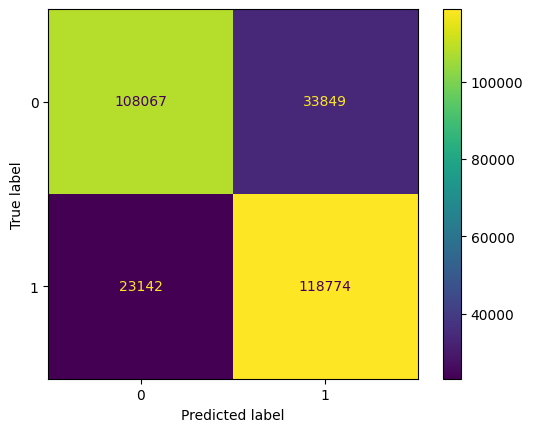

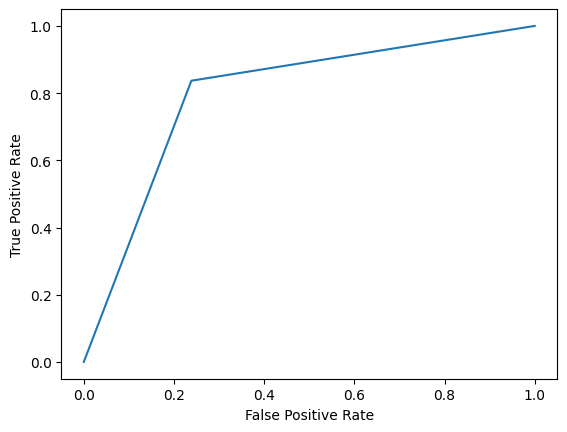



Logistic Regressor AUC score: 0.7992086868288284


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95    141916
           1       0.95      0.96      0.95    141916

    accuracy                           0.95    283832
   macro avg       0.95      0.95      0.95    283832
weighted avg       0.95      0.95      0.95    283832
 

Decision Tree Confusion Matrix: 
         0       1
0  134367    7549
1    6078  135838 



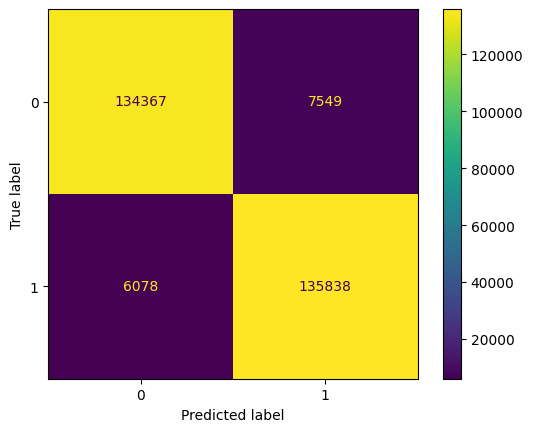

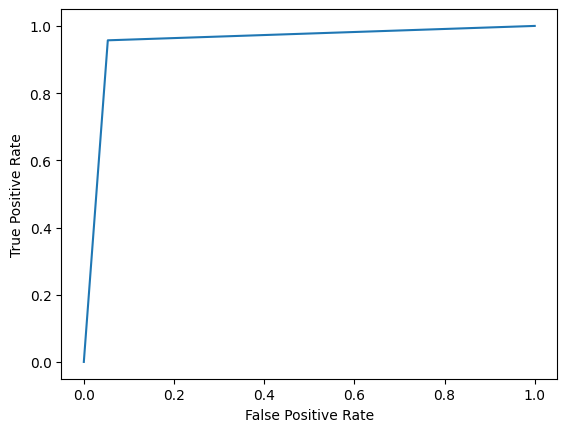



Decision Tree AUC score: 0.951989204881761


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    141916
           1       0.98      0.97      0.98    141916

    accuracy                           0.98    283832
   macro avg       0.98      0.98      0.98    283832
weighted avg       0.98      0.98      0.98    283832
 

Random Forest Confusion Matrix: 
         0       1
0  139484    2432
1    3687  138229 



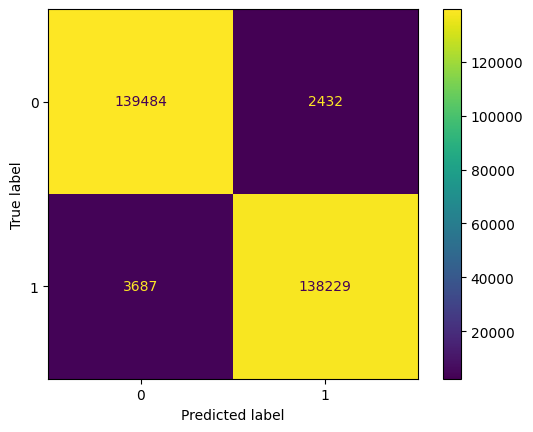

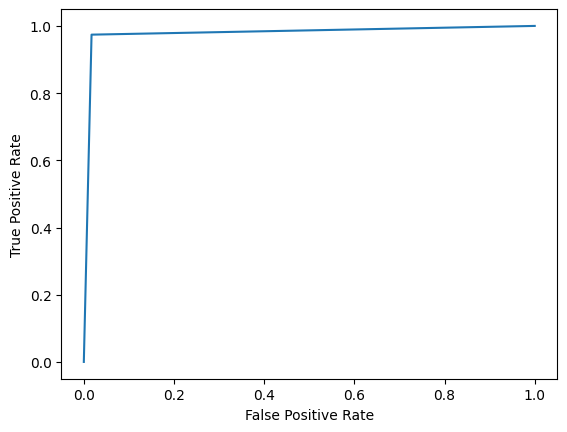



Random Forest AUC score: 0.9784414724203049


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    141916
           1       0.99      0.96      0.98    141916

    accuracy                           0.98    283832
   macro avg       0.98      0.98      0.98    283832
weighted avg       0.98      0.98      0.98    283832
 

XGBoost Confusion Matrix: 
         0       1
0  140390    1526
1    5097  136819 



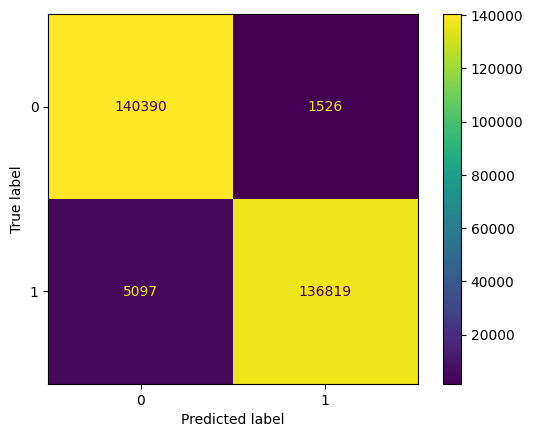

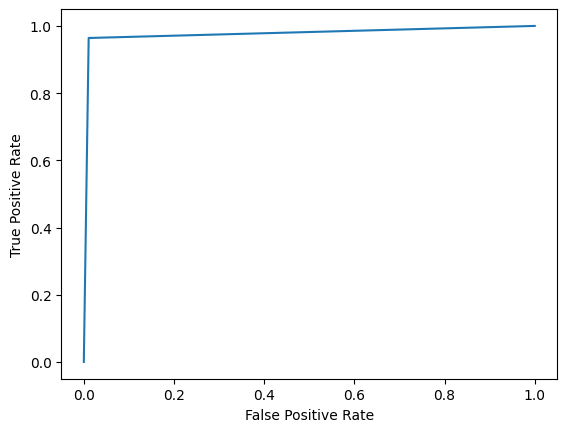



XGBoost AUC score: 0.9766657741199021


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.165013
0:	learn: 0.5785072	total: 303ms	remaining: 5m 3s
100:	learn: 0.1107284	total: 8.5s	remaining: 1m 15s
200:	learn: 0.0851207	total: 17.6s	remaining: 1m 9s
300:	learn: 0.0751063	total: 25.6s	remaining: 59.4s
400:	learn: 0.0693732	total: 32.9s	remaining: 49.2s
500:	learn: 0.0658764	total: 40.4s	remaining: 40.2s
600:	learn: 0.0628861	total: 47.7s	remaining: 31.7s
700:	learn: 0.0607453	total: 54.9s	remaining: 23.4s
800:	learn: 0.0589160	total: 1m 2s	remaining: 15.5s
900:	learn: 0.0572314	total: 1m 12s	remaining: 7.92s
999:	learn: 0.0558555	total: 1m 20s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    141916
           1       0.99      0.97      0.98    141916

    a

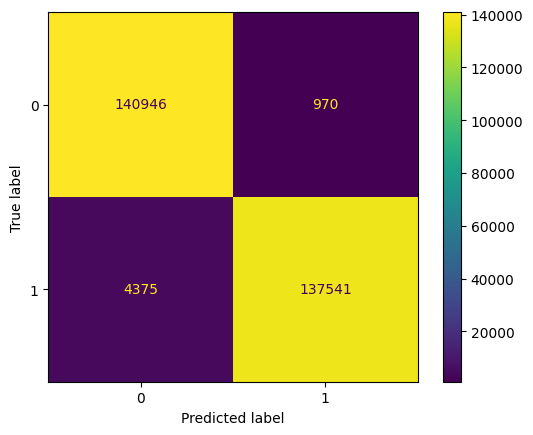

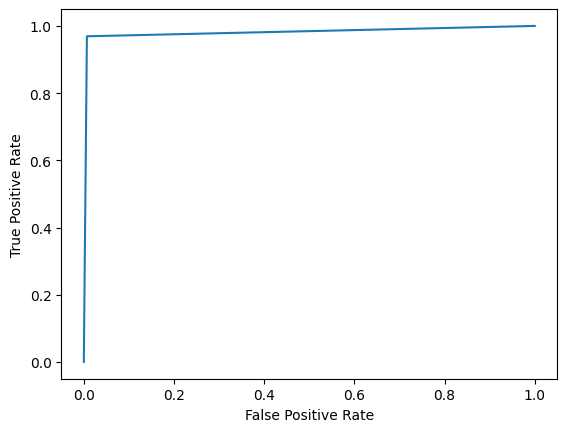



CatBoost AUC score: 0.9811684376673525


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


[LightGBM] [Info] Number of positive: 331137, number of negative: 331137
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 662274, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97    141916
           1       0.98      0.95      0.97    141916

    accuracy                           0.97    283832
   macro avg       0.97      0.97      0.97    283832
weighted avg       0.97      0.97      0.97    2838

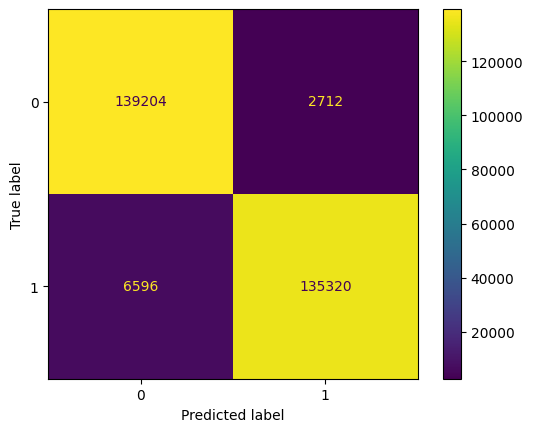

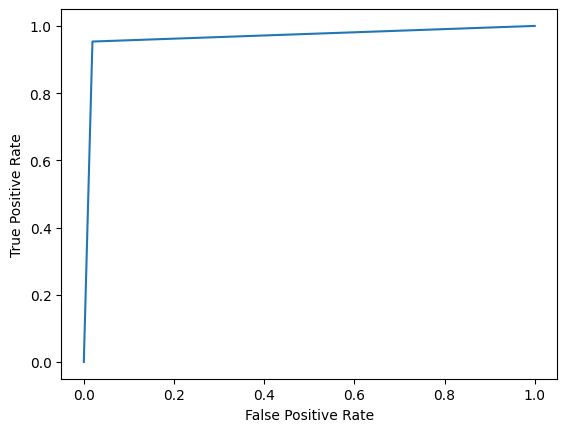



LightGBM AUC score: 0.9672059528171595


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
CatBoost,0.992997,0.969172,0.980940,0.981168,0.981168
Random Forest,0.982710,0.974020,0.978346,0.978441,0.978441
XGBoost,0.988970,0.964084,0.976368,0.976666,0.976666
LightGBM,0.980352,0.953522,0.966751,0.967206,0.967206
Decision Tree,0.947352,0.957172,0.952237,0.951989,0.951989
Logistic Regressor,0.778218,0.836932,0.806508,0.799209,0.799209


In [139]:
# Fit and evaluate the models
model_performances = classification_fit_and_score(smote_models)
model_performances

### Evaluation on the Test Data


In [142]:
# Splitting the test data
test_X = eval_data.drop(columns= ["CHURN"])
test_y = eval_data["CHURN"]

In [ ]:
# Scale the numeric columns
test_X[numerics] = scaler.transform(test_X[numerics])

In [144]:
# Refit the top models to the training data
## CatBoost Model
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
catb_model.fit(X_train, y_train)

## Random Forest
rf_model = RandomForestClassifier(random_state=24)
rf_model.fit(X_train, y_train)

## XGBoost
xgb_model = XGBClassifier(random_state=24)
xgb_model.fit(X_train, y_train)

# Create a dictionary of the top models
select_models = {
    "CatBoost": catb_model,
    "RandomForest": rf_model,
    "XGBoost": xgb_model
}

Learning rate set to 0.165013
0:	learn: 0.5785072	total: 73.1ms	remaining: 1m 13s
100:	learn: 0.1107284	total: 8.79s	remaining: 1m 18s
200:	learn: 0.0851207	total: 16s	remaining: 1m 3s
300:	learn: 0.0751063	total: 24s	remaining: 55.6s
400:	learn: 0.0693732	total: 31.4s	remaining: 46.9s
500:	learn: 0.0658764	total: 38.7s	remaining: 38.5s
600:	learn: 0.0628861	total: 46.1s	remaining: 30.6s
700:	learn: 0.0607453	total: 53.5s	remaining: 22.8s
800:	learn: 0.0589160	total: 1m 1s	remaining: 15.2s
900:	learn: 0.0572314	total: 1m 8s	remaining: 7.51s
999:	learn: 0.0558555	total: 1m 15s	remaining: 0us


In [145]:
# Defining a helper function to evaluate the models at a go
def model_evaluation(fit_models, X_test, y_test):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
           
        print("Confusion Matrix for the", name, "model")
        
        # Confusion Matrix
        conf_mat = confusion_matrix(y_test, pred, labels =[0,1])
        conf_mat = pd.DataFrame(conf_mat,columns=["Actual Positive", "Actual Negative"], 
                                index=["Predict Positive", "Predict Negative"])
        

        # Visualize the Confusion Matrix
        f, ax = plt.subplots()
        sns.heatmap(conf_mat,
                    annot= True,
                    linewidth= 1.0,
                    fmt= ".0f",
                    cmap= "RdPu",
                    ax= ax
                   )
        plt.title("The Confusion Matrix of the Predictions")
        plt.show()
        print("\n")


        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        print(f"{name} AUC score: {roc_auc_score(y_test, pred)}")
        print("\n")


        lst.append([
            name,
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),
            accuracy_score(y_test, pred),
            roc_auc_score(y_test, pred)
        ])

    
        # Feature importances
        importance = model.feature_importances_
        importance = pd.DataFrame(importance, columns=["score"]).reset_index()
        importance["Feature"] = list(X.columns)
        importance.drop(columns=["index"], inplace=True)

        importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

        # Plotting the feature importances
        fig = px.bar(importance, x="Feature", y="score")
        fig.show()
        
        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")

    eval_df = pd.DataFrame(lst, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc", "f1_score", "accuracy", "recall"], ascending=False, inplace= True)

    return eval_df


Confusion Matrix for the CatBoost model


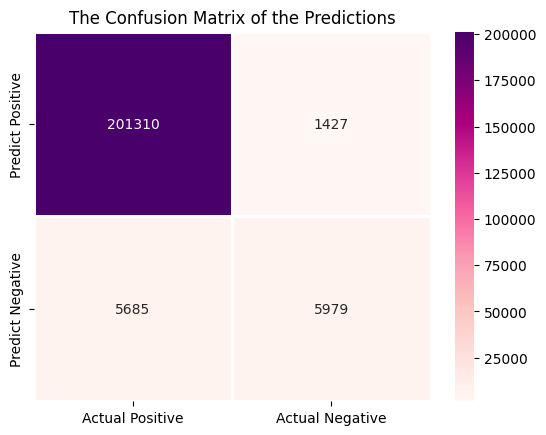

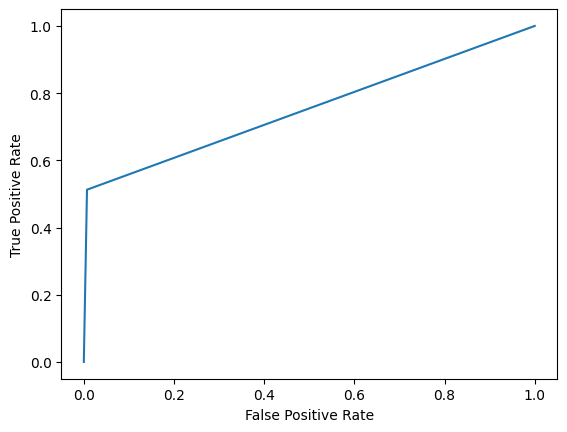



CatBoost AUC score: 0.7527821024678508






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Confusion Matrix for the RandomForest model


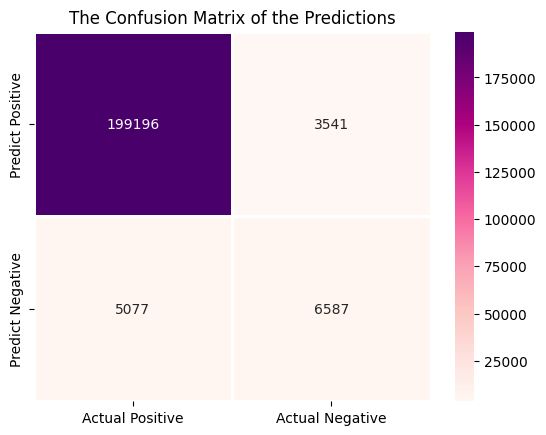

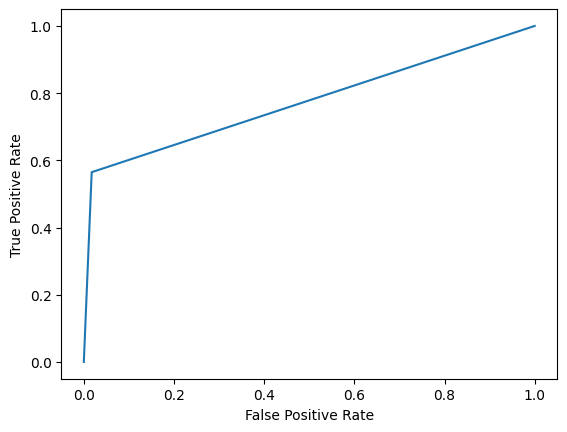



RandomForest AUC score: 0.7736315514214721






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Confusion Matrix for the XGBoost model


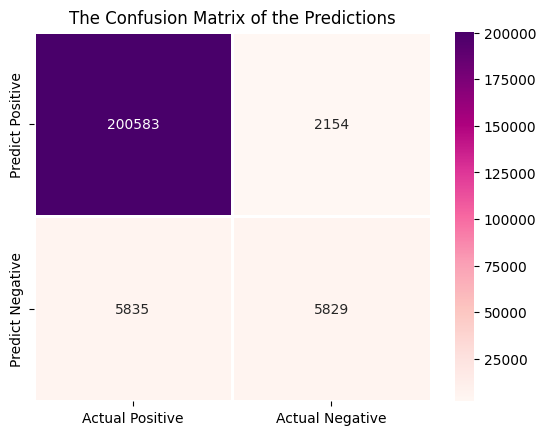

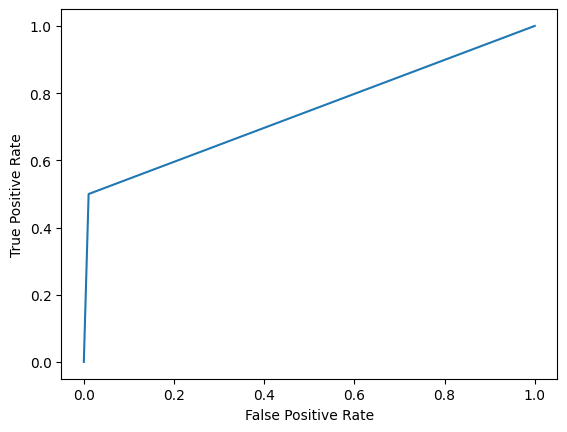



XGBoost AUC score: 0.7445590980183109






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
RandomForest,0.650375,0.564729,0.604534,0.959804,0.773632
CatBoost,0.807318,0.512603,0.627058,0.966829,0.752782
XGBoost,0.730177,0.499743,0.593373,0.962738,0.744559


In [148]:
# Evaluate the top models
final_model_eval = model_evaluation(fit_models = select_models, X_test = test_X, y_test = test_y)
final_model_eval

###  Predict on the Unseen Data

In [149]:
# Check the shape of the test data
test.shape

(190063, 18)

In [150]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [151]:
# Cast all column names to uppercase
test.columns = test.columns.str.upper()

In [153]:
# Drop the columns we won't need
test.drop(columns = ["USER_ID", "MRG", "ARPU_SEGMENT", "ZONE1", "ZONE2"], inplace= True)

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [131]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [132]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app